In [1]:
#Code to read data posted to Thingspeak channel for the environmental stations and:
#Display the latest sensor data values from each individual environmental station
#Display the sensor values from the last 5 hours from all stations for a specific type of sensor

import requests #for thingspreak API read requests
import matplotlib.pyplot as plt #for graph plotting
from datetime import datetime, timedelta #to get data from last 5 hours
import time #for continuous plotting


#Read API keys and channel IDs for each of the three stations. can easily be expanded
READ_API_KEYS = ["T34ZFQCCFNBF1WEG", "07TQ12EHUFEVX5AG", "SDO8TWU0NNTI5JUY"]
CHANNEL_IDS = ["2479333", "2479372", "2479376"]

BASE_URL = "https://api.thingspeak.com/channels/{channel_id}/feeds.json"

#info about the different sensor types
sensor_fields = ['field1', 'field2', 'field3']
sensor_titles = ['Temperature (°C)', 'Humidity (%)', 'CO2 (ppm)']

#Some GPT assistance for plotting and time formatting specifics

#get channel data over last 5 hours for a station
def fetch_channel_data(channel_id, read_api_key, minutes=300):
    #5 hours ago
    start_date = datetime.utcnow() - timedelta(minutes=minutes)
    start = start_date.strftime('%Y-%m-%dT%H:%M:%SZ')
    
    #API URL, request
    url = BASE_URL.format(channel_id=channel_id) + f"?api_key={read_api_key}&start={start}"
    response = requests.get(url)
    
    #return response
    if response.status_code == 200:
        return response.json()['feeds']
    else:
        print(f"Error fetching data for channel {channel_id}: {response.status_code}")
        return []

#plot data for a specific sensor, for all stations
def plot_sensor_data(feeds, sensor_field, label):
    #created_at field for when data was collected
    timestamps = [feed['created_at'] for feed in feeds]
    values = [int(feed[sensor_field]) for feed in feeds]
    
    timestamps = [datetime.strptime(ts, '%Y-%m-%dT%H:%M:%SZ') for ts in timestamps]
    
    plt.plot(timestamps, values, label=label)



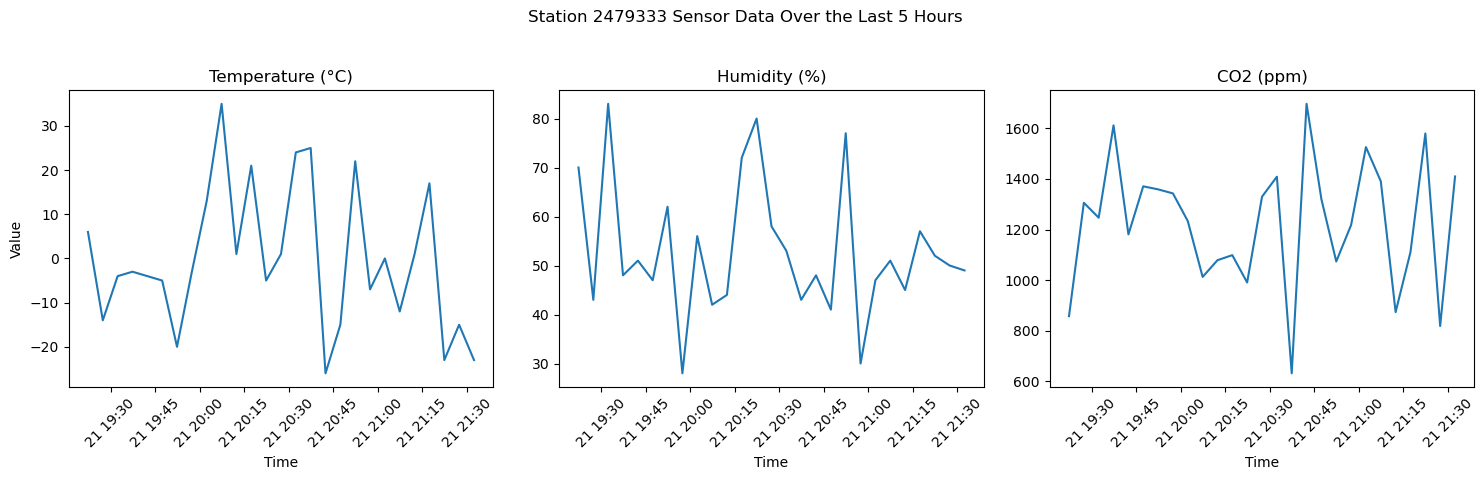

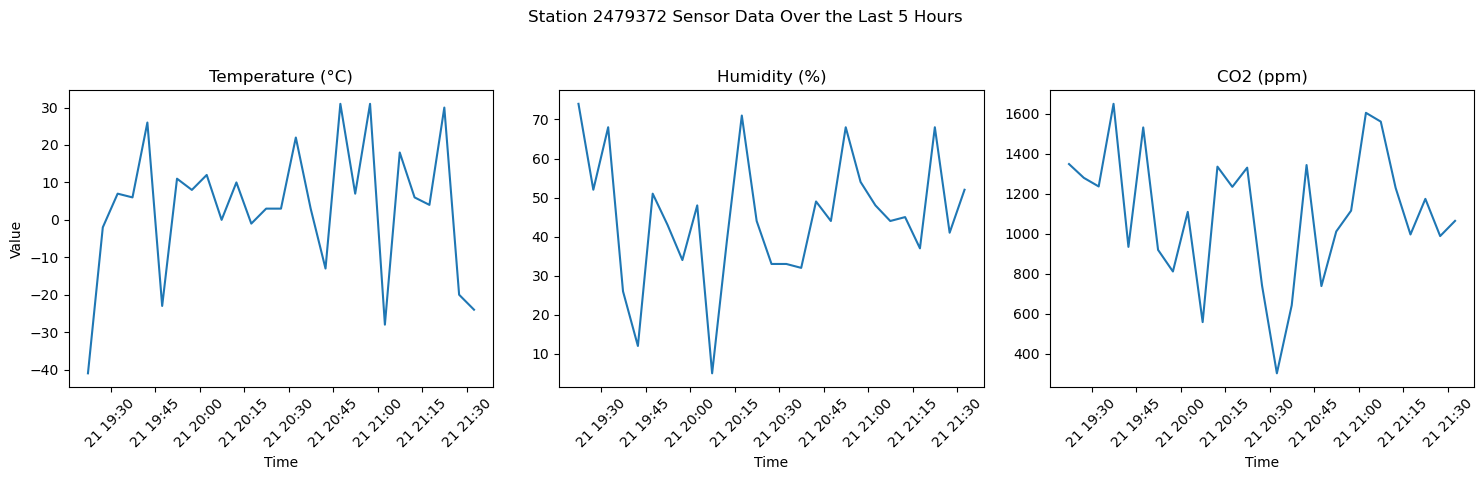

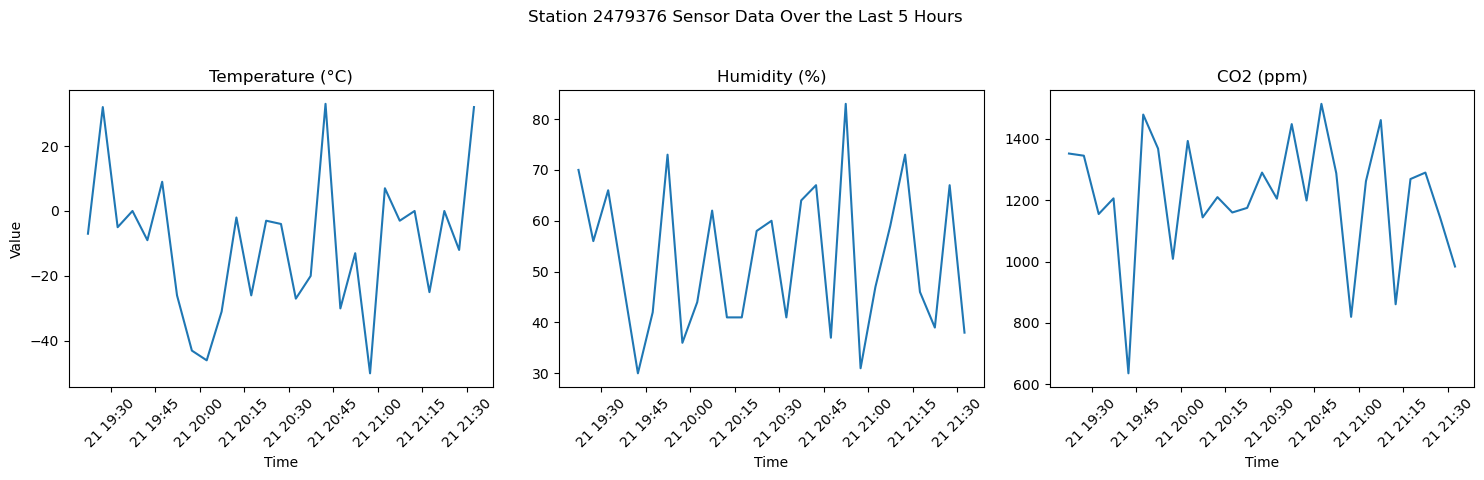

In [2]:
#plot each sensors data for each station side by side, basically the same as Thingspeak dashboard
def plot_station_sensors():
    for station_id, api_key in zip(CHANNEL_IDS, READ_API_KEYS):
        feeds = fetch_channel_data(station_id, api_key)

        fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
        fig.suptitle(f'Station {station_id} Sensor Data Over the Last 5 Hours')

        #plot data for each sensor
        for i, (field, title) in enumerate(zip(sensor_fields, sensor_titles)):
            timestamps = [feed['created_at'] for feed in feeds]
            values = [float(feed[field]) for feed in feeds if field in feed]

            dates = [datetime.strptime(ts, '%Y-%m-%dT%H:%M:%SZ') for ts in timestamps]

            axes[i].plot(dates, values)
            axes[i].set_title(title)
            axes[i].set_xlabel('Time')
            axes[i].tick_params(axis='x', rotation=45)

        axes[0].set_ylabel('Value')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


plot_station_sensors()

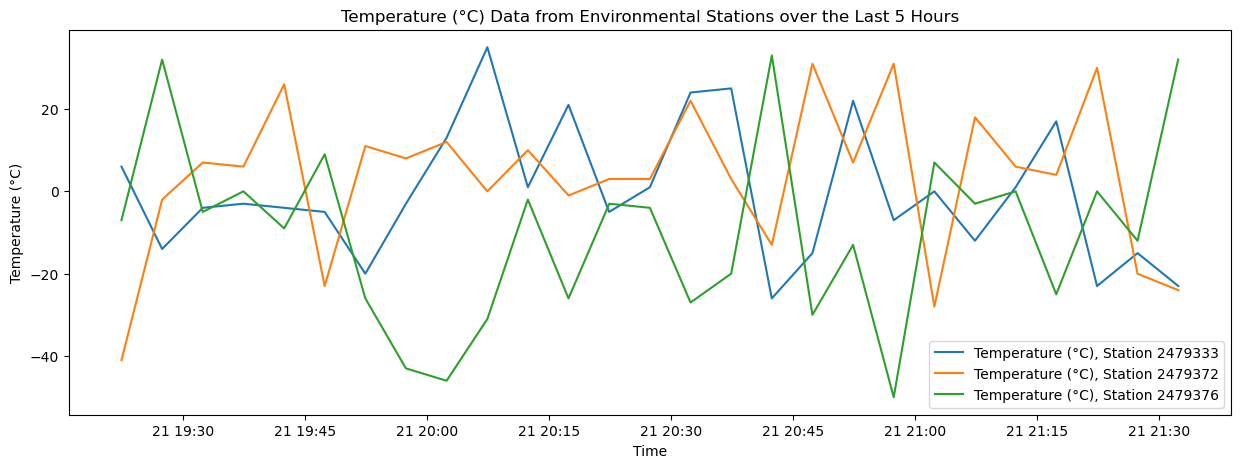

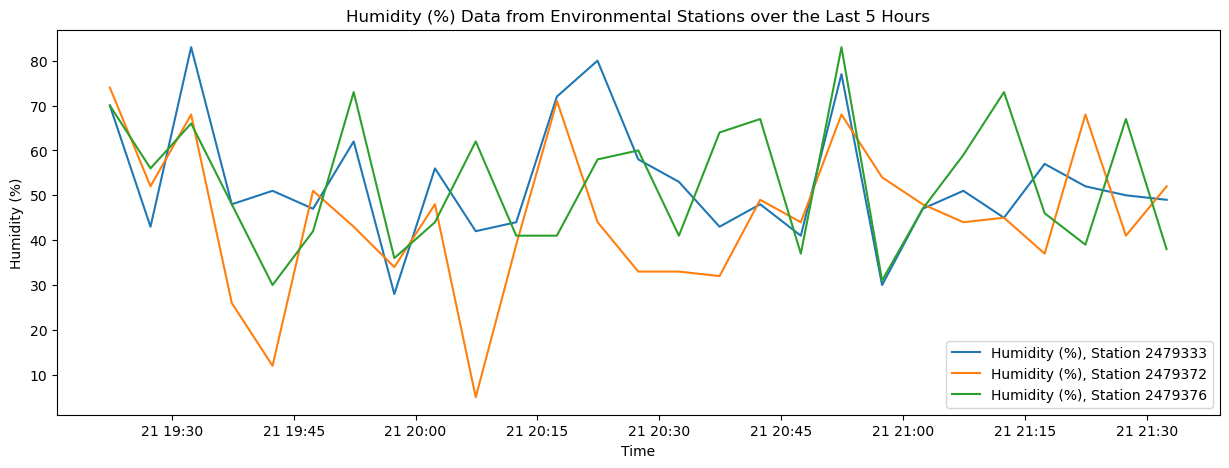

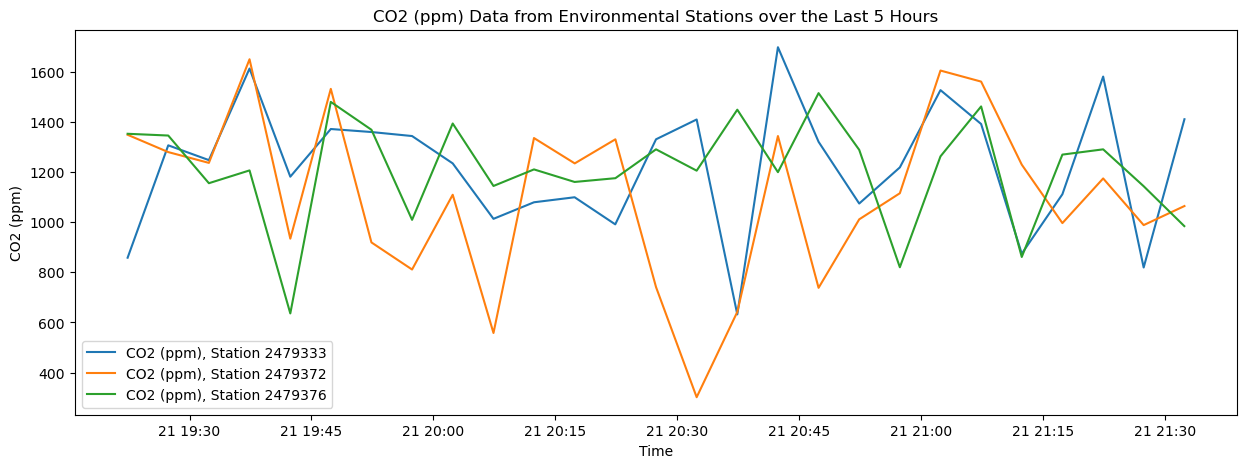

In [3]:
#for each specific type of sensor, plot data from each station for that sensor
def plot_sensor_types():
    for field, title in zip(sensor_fields, sensor_titles):
        plt.figure(figsize=(15, 5))
        for channel_id, api_key in zip(CHANNEL_IDS, READ_API_KEYS):
            feeds = fetch_channel_data(channel_id, api_key)
            plot_sensor_data(feeds, field, f"{title}, Station {channel_id}")
        plt.xlabel("Time")
        plt.ylabel(title)
        plt.title(f"{title} Data from Environmental Stations over the Last 5 Hours")
        plt.legend()
        plt.show()

plot_sensor_types()

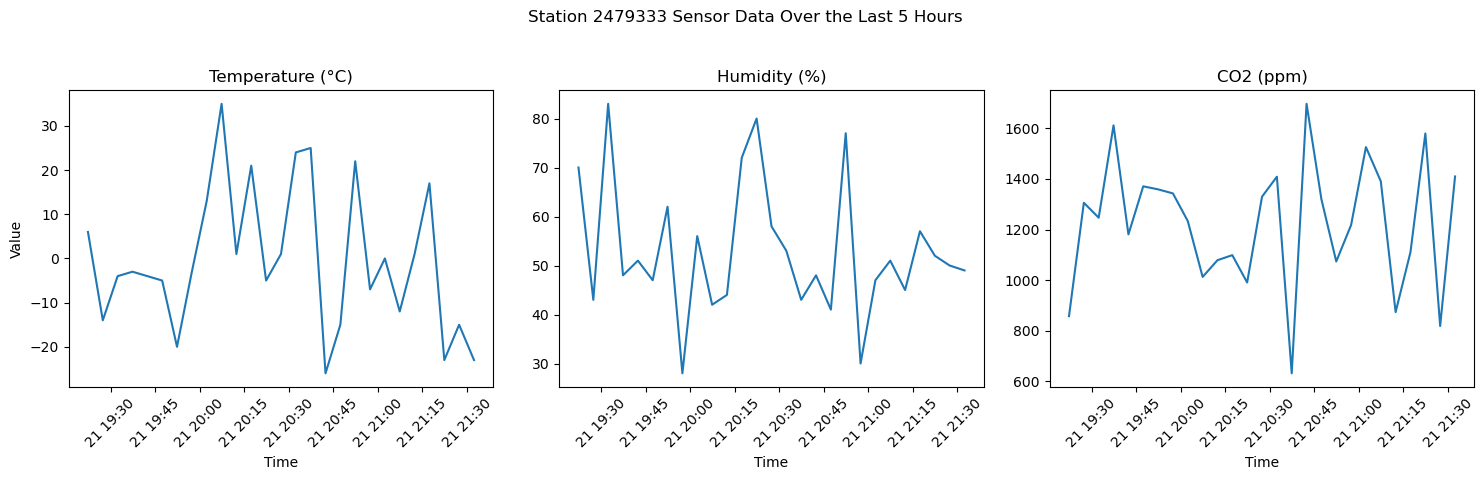

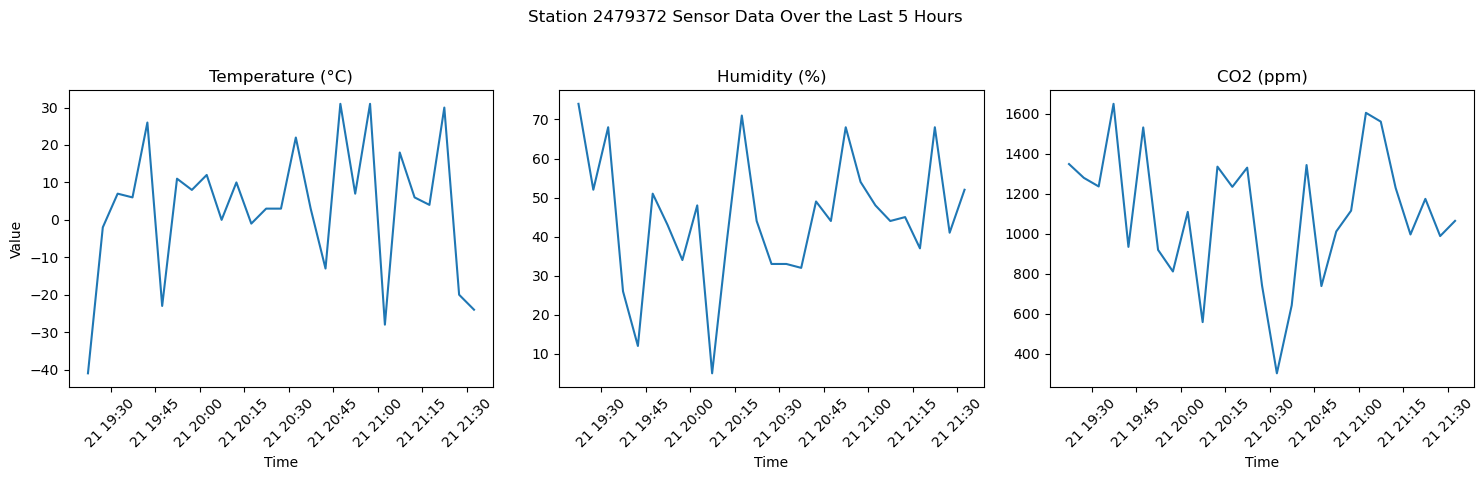

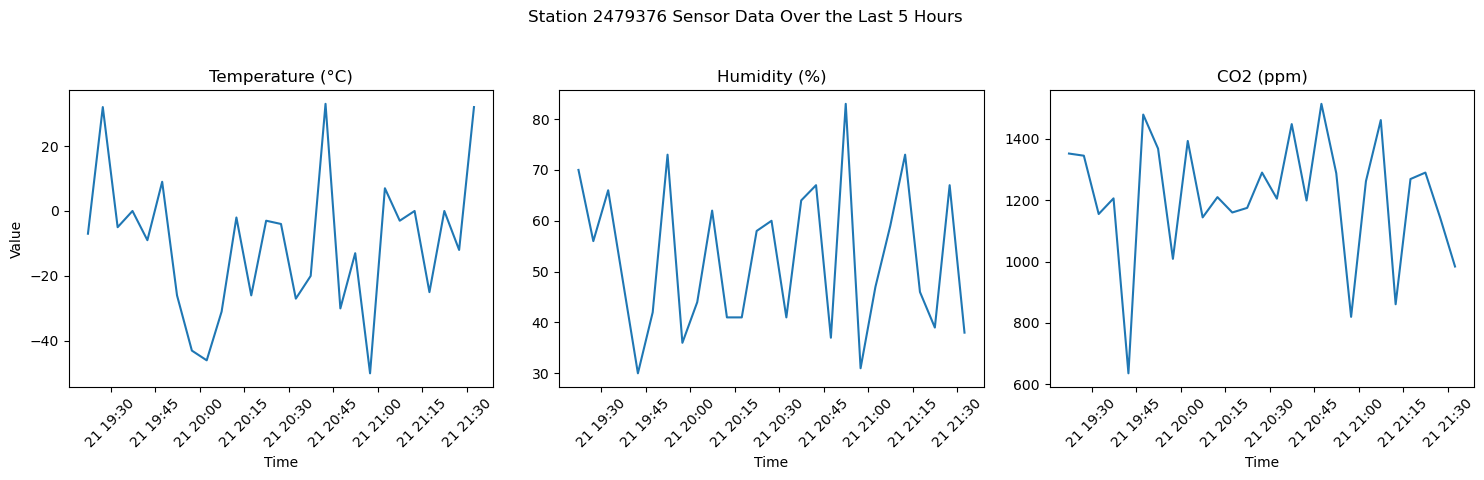

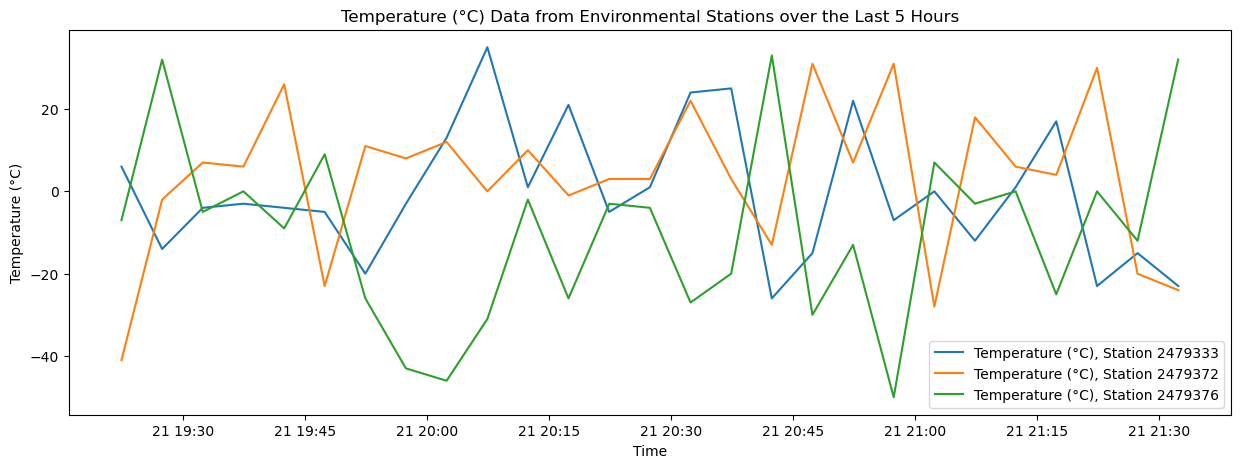

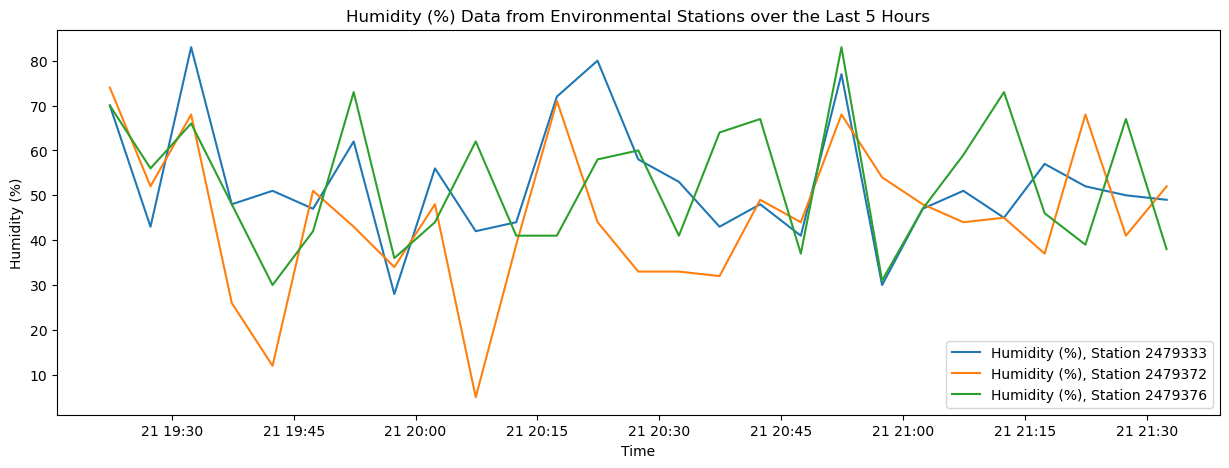

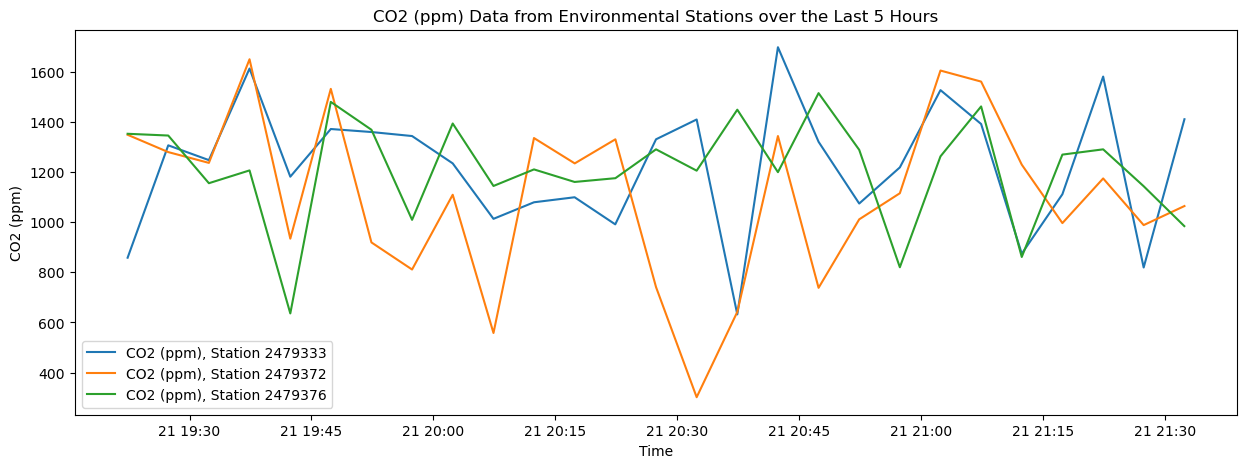

Graphs generated. Updating in 30 seconds...


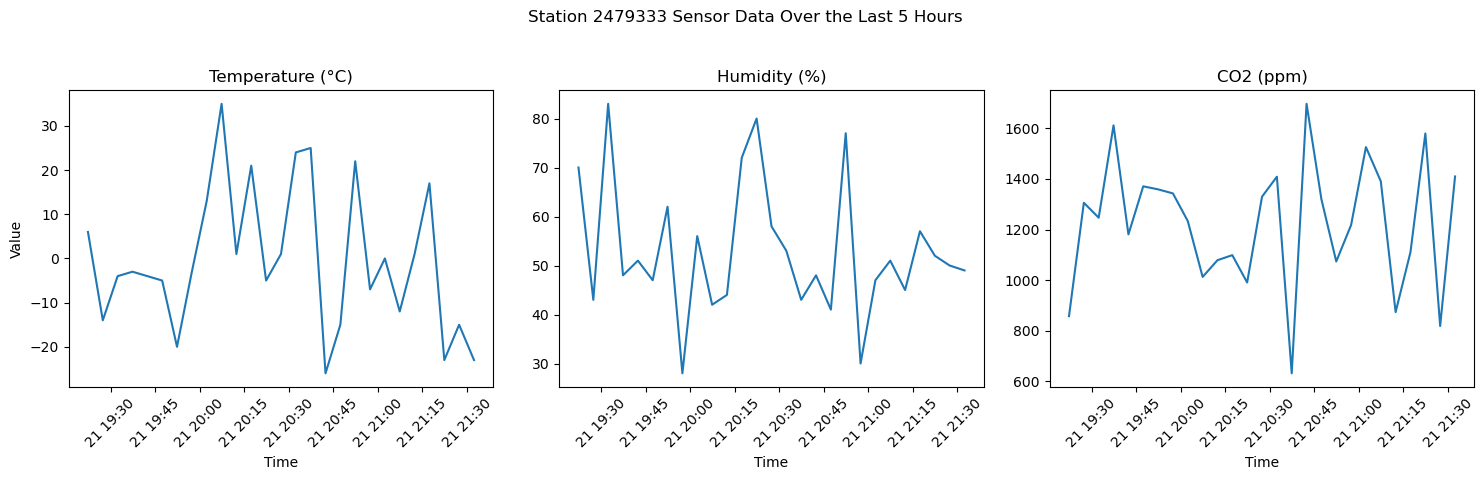

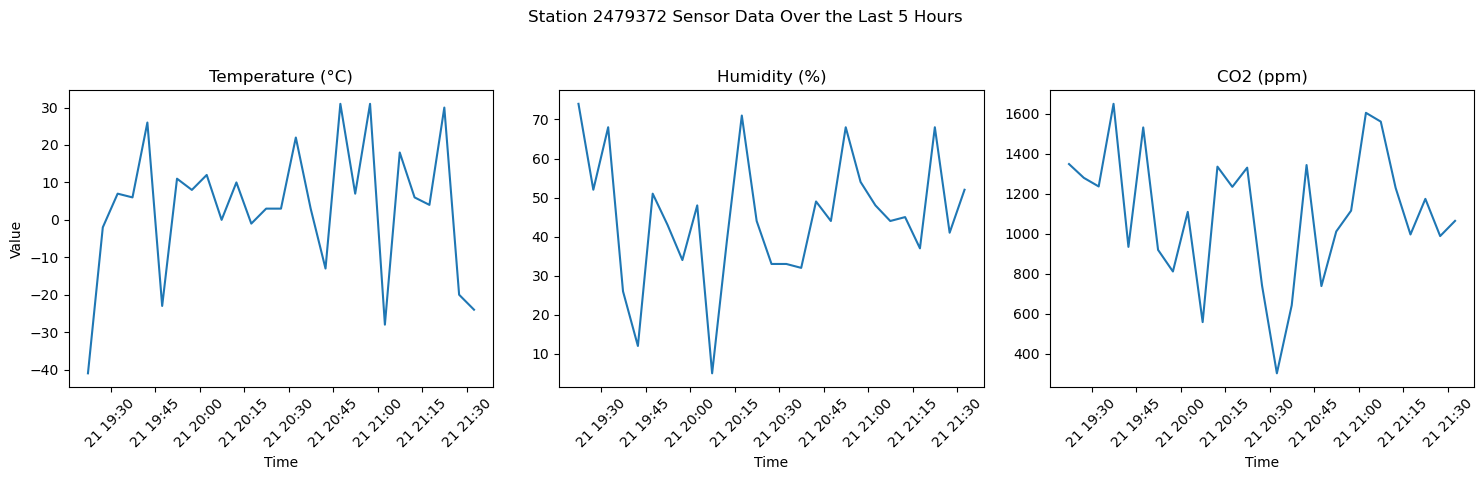

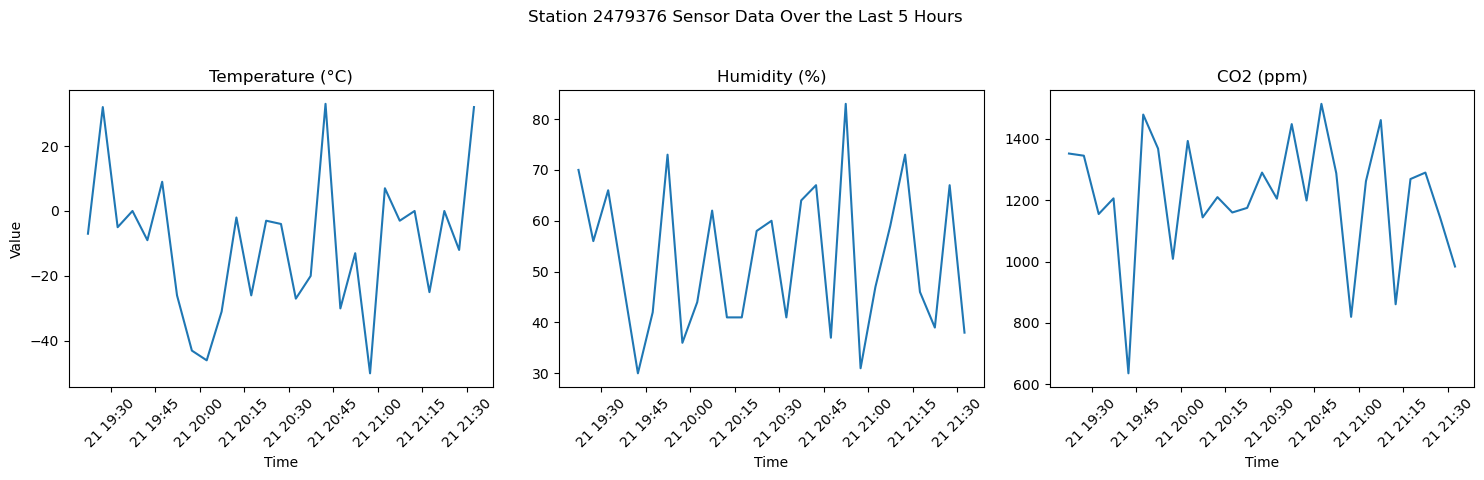

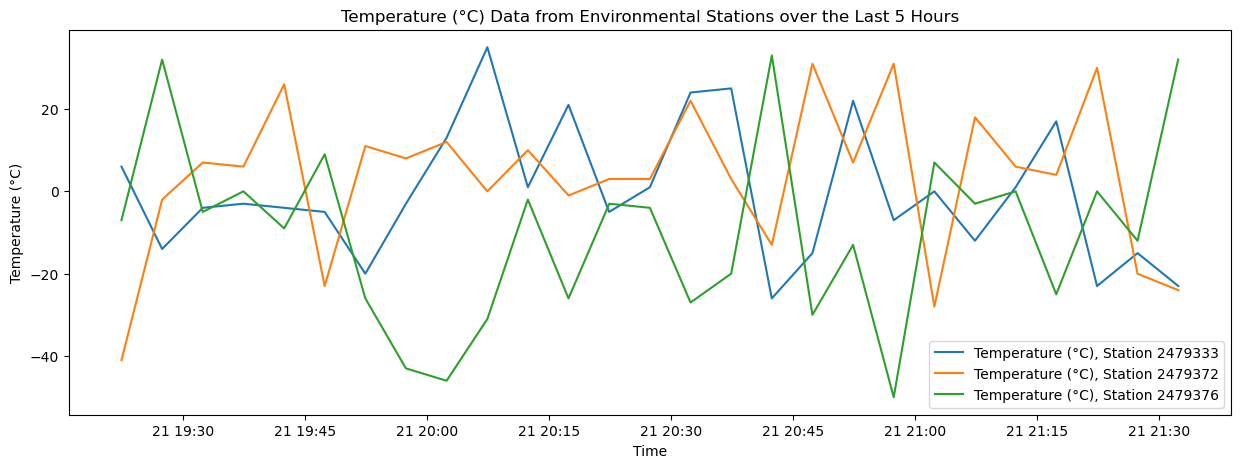

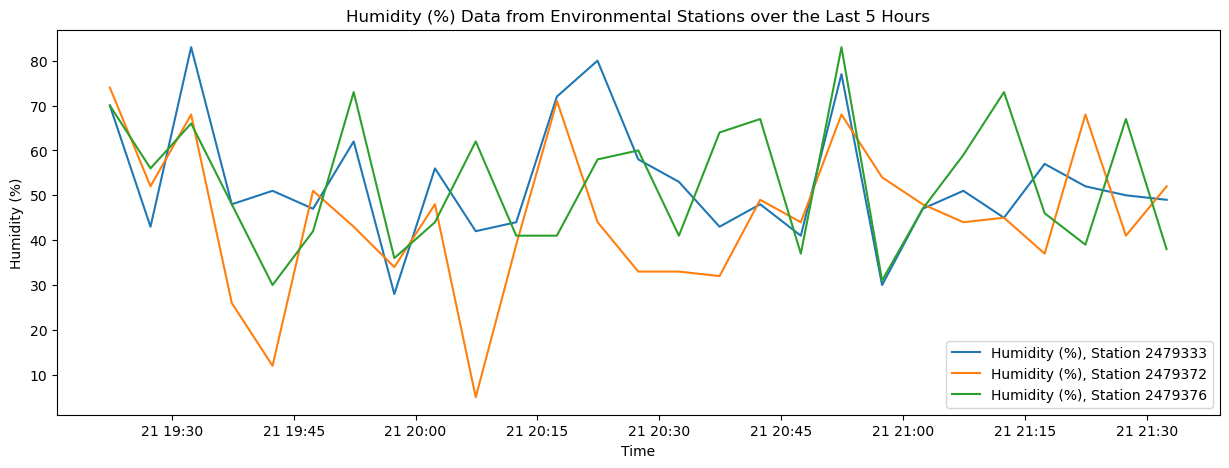

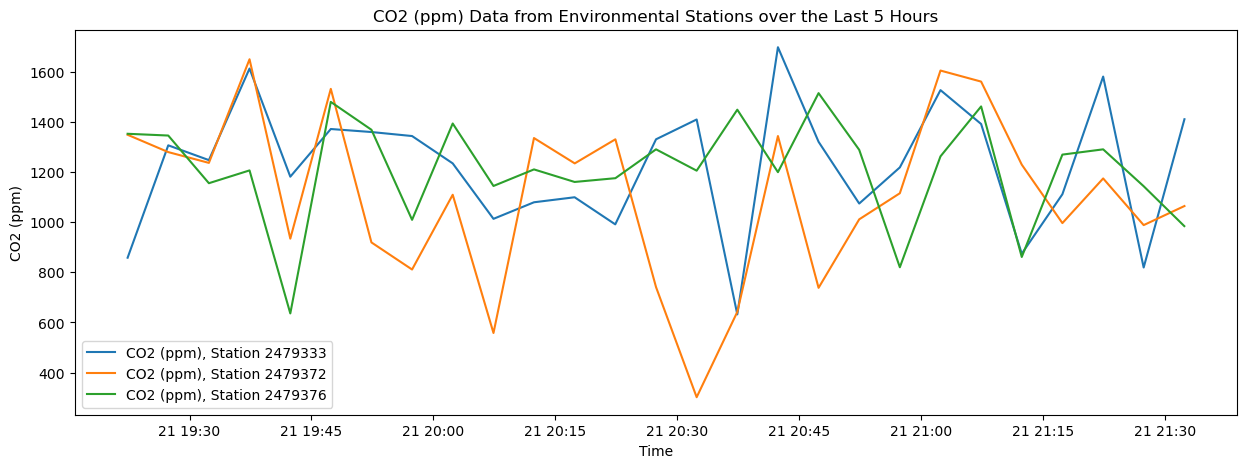

Graphs generated. Updating in 30 seconds...


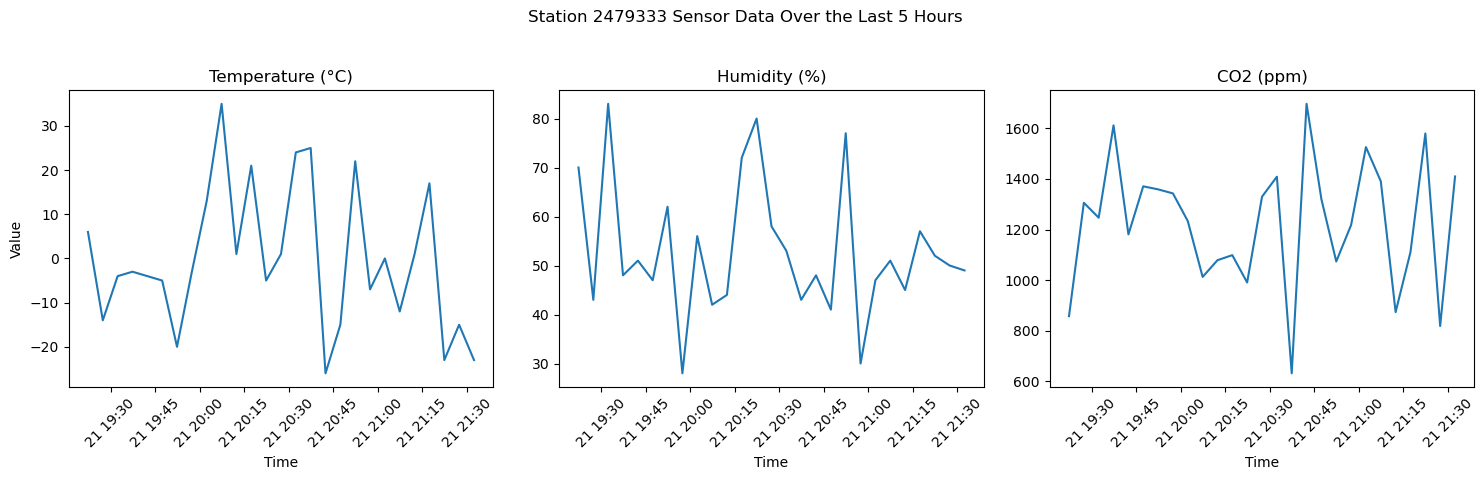

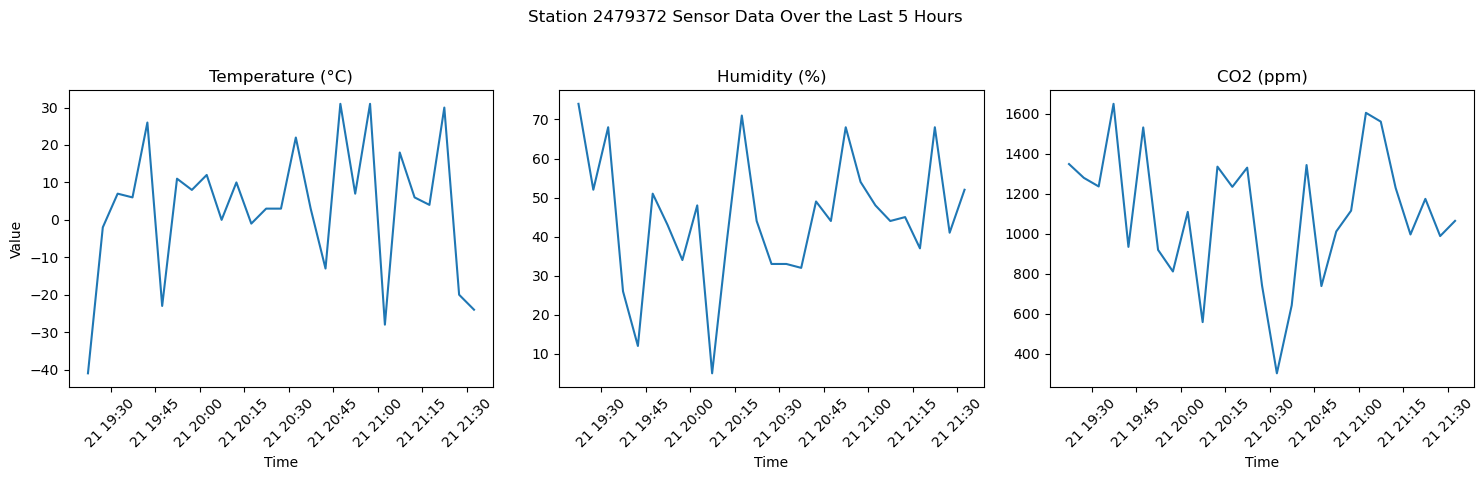

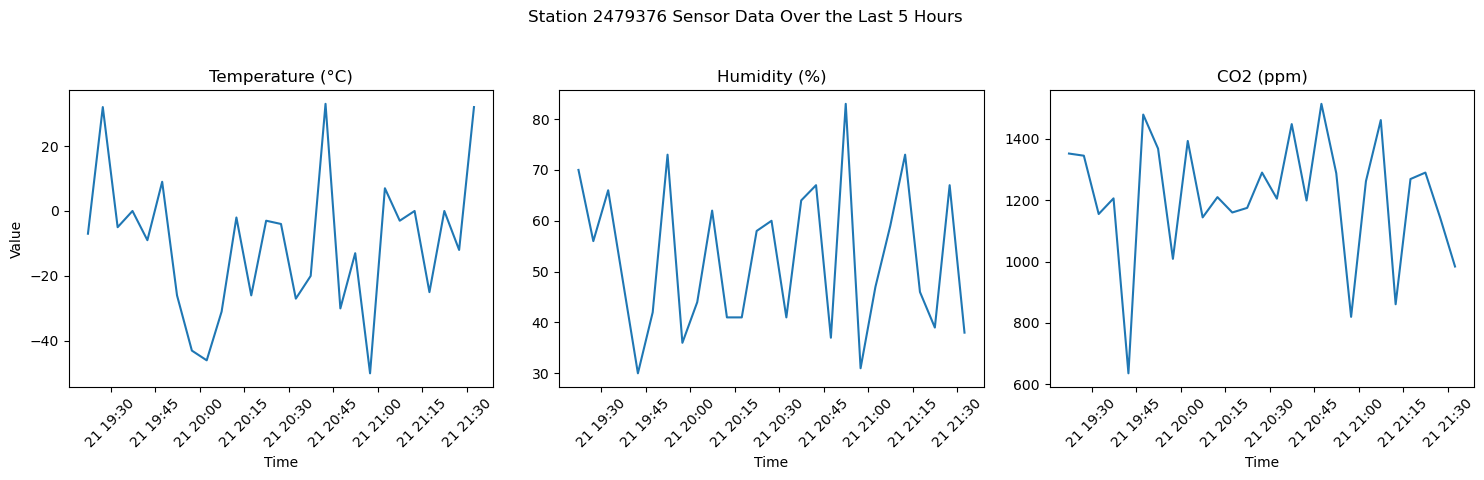

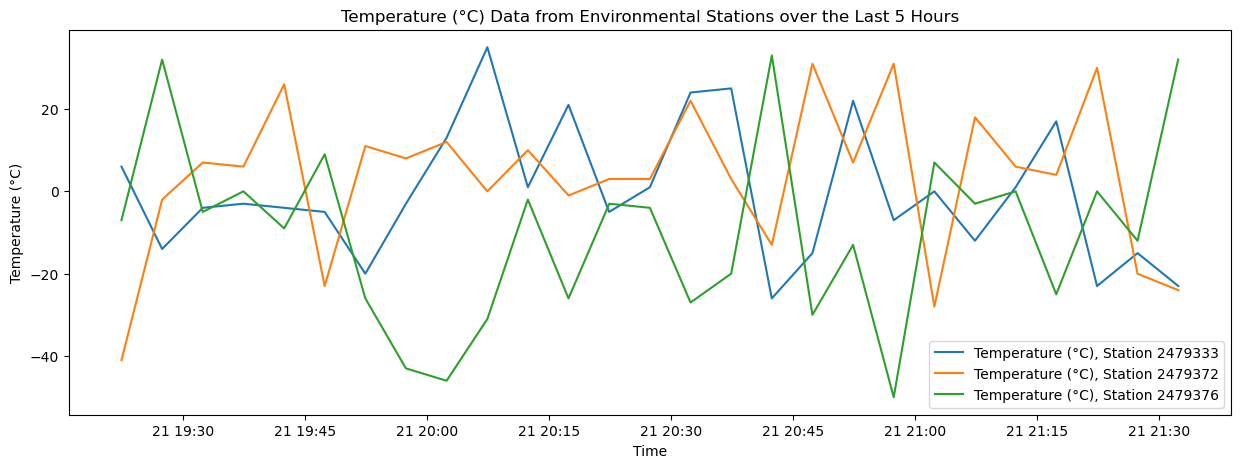

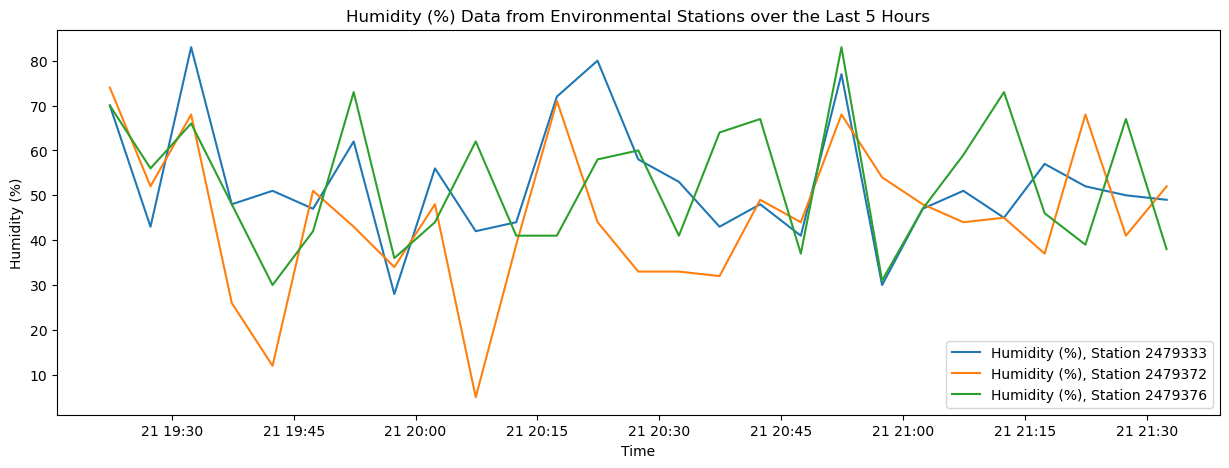

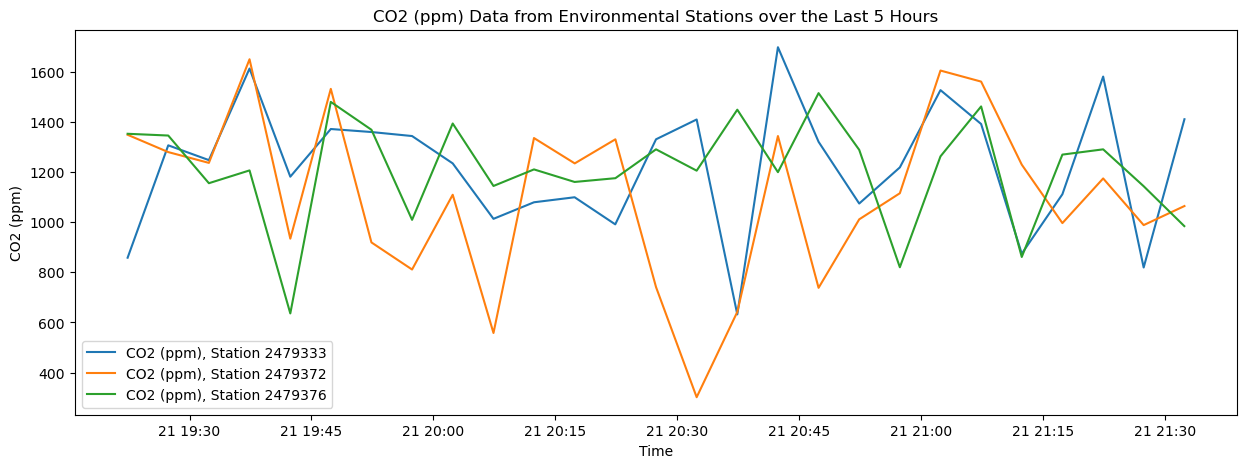

Graphs generated. Updating in 30 seconds...


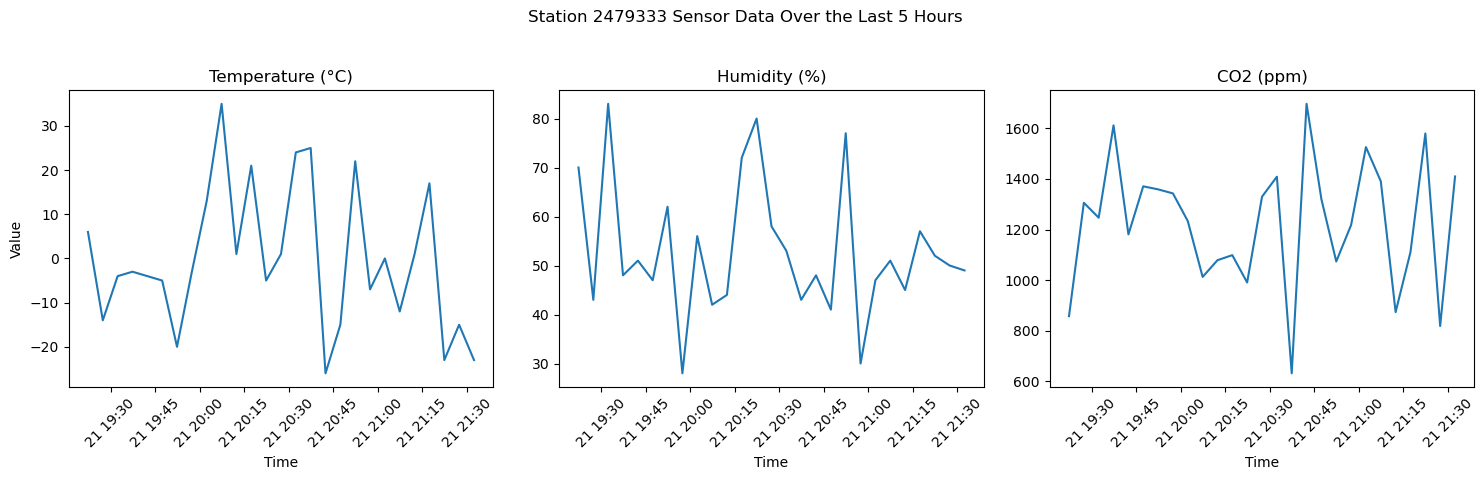

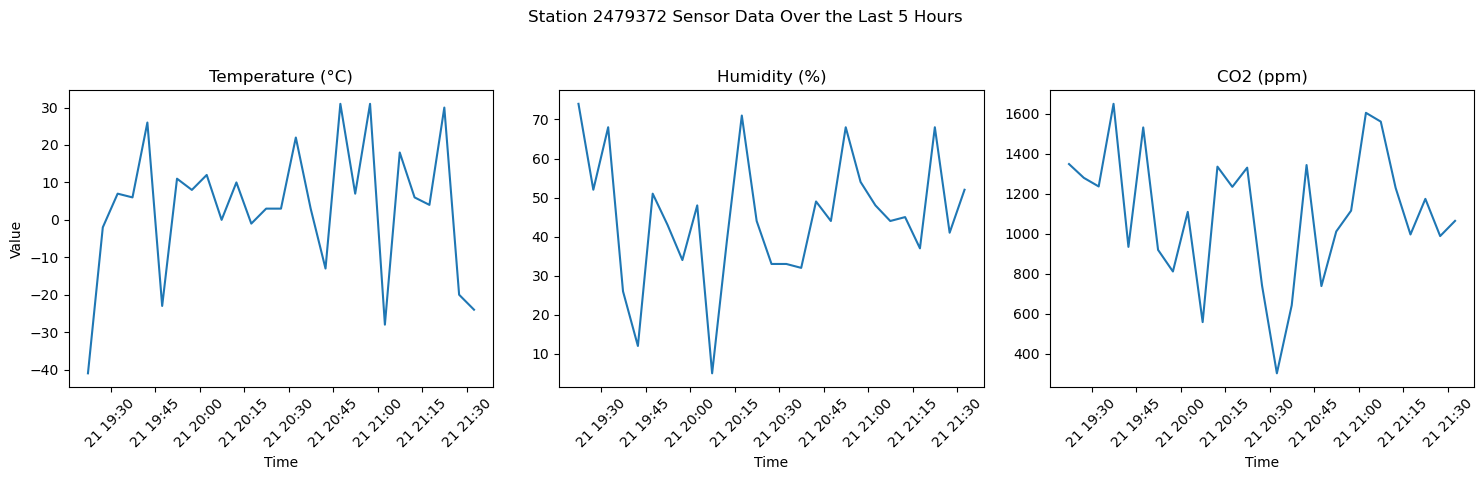

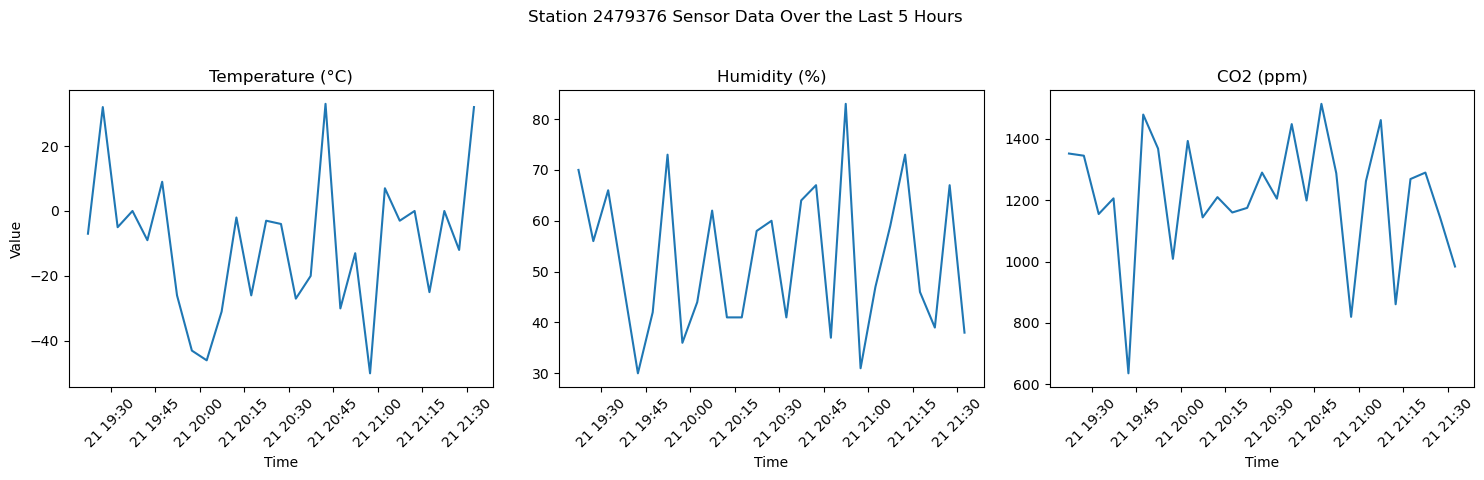

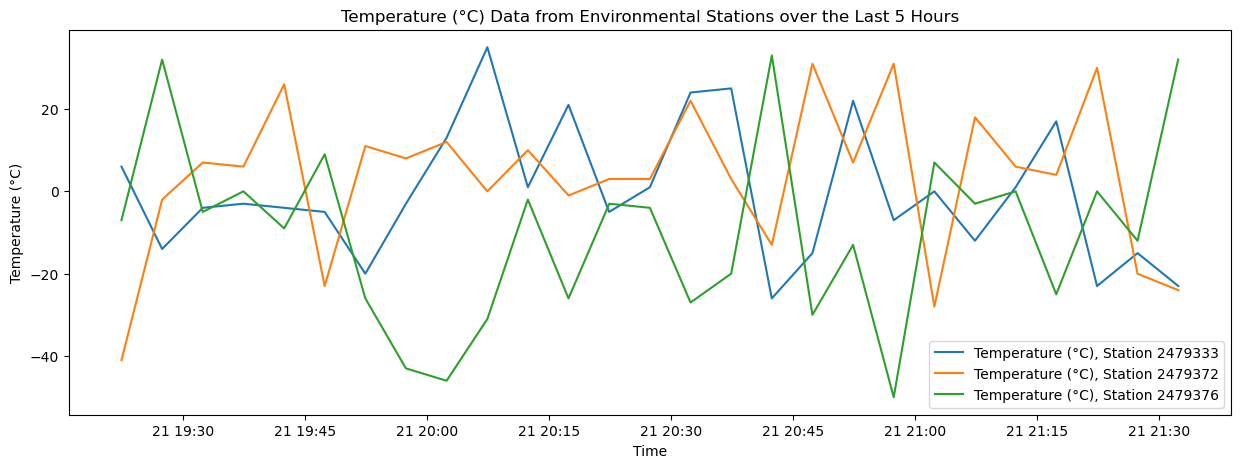

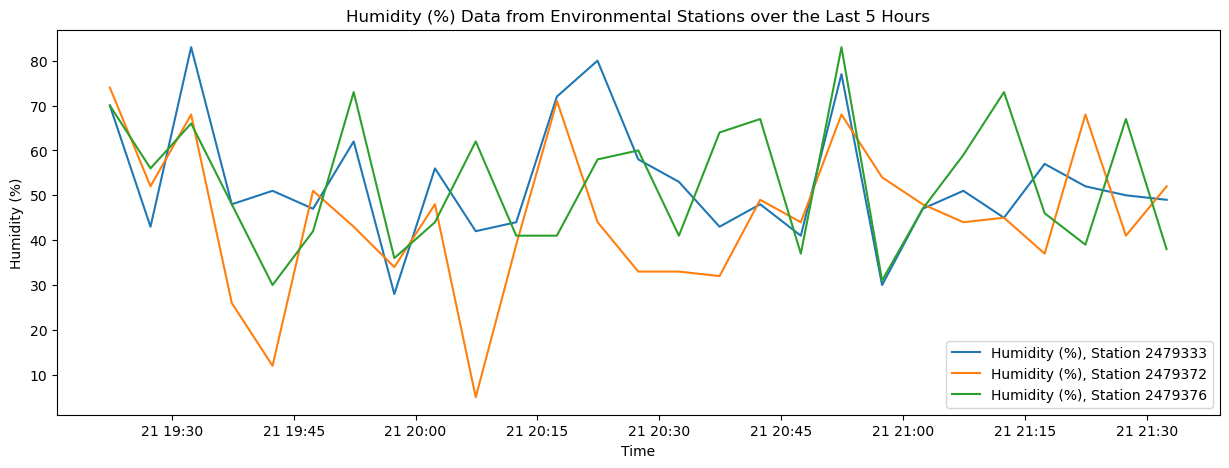

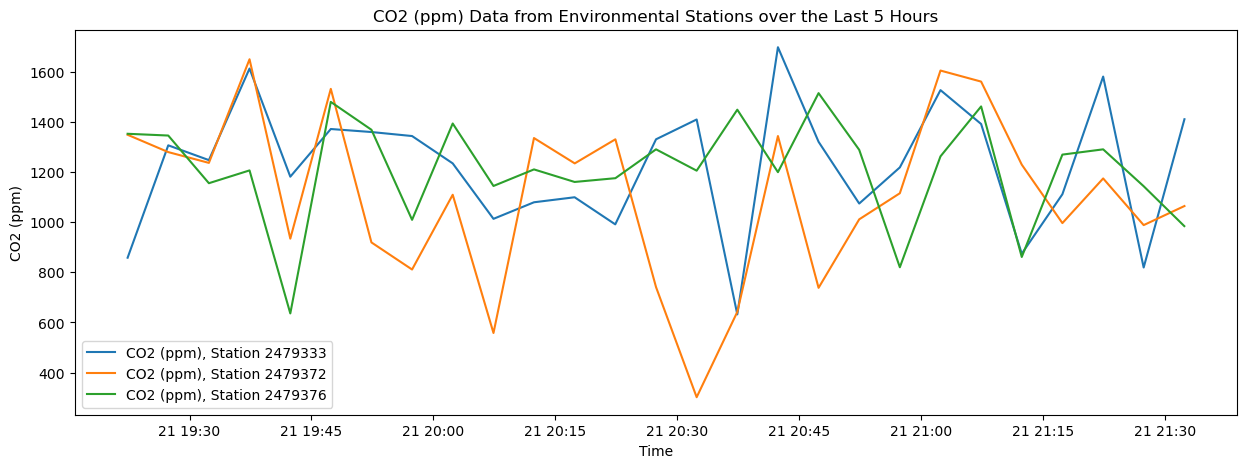

Graphs generated. Updating in 30 seconds...


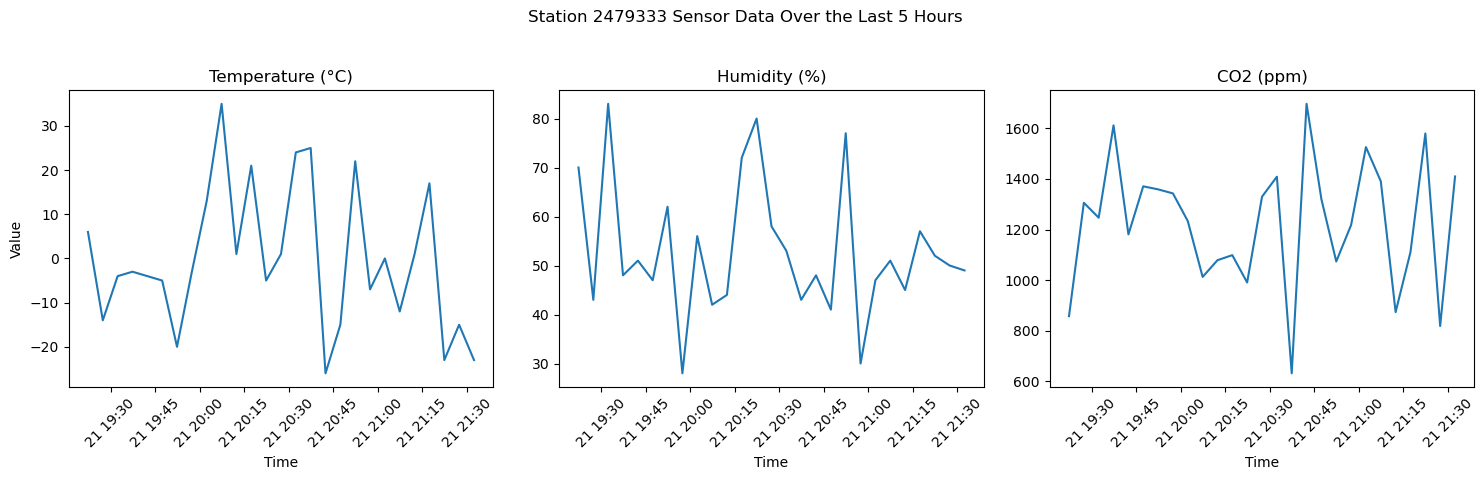

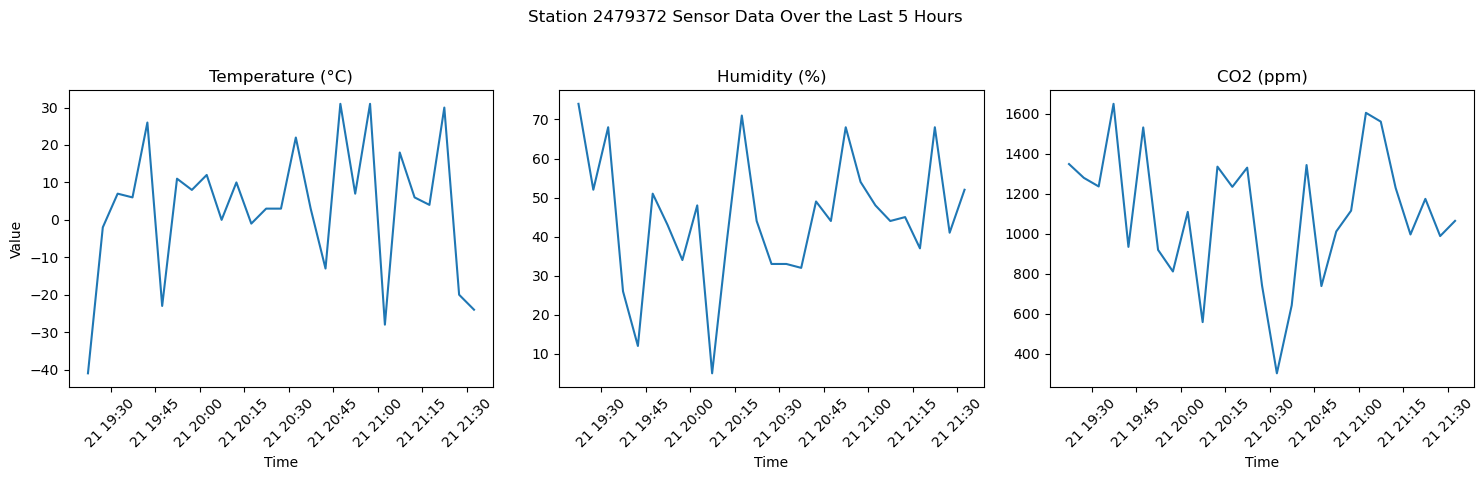

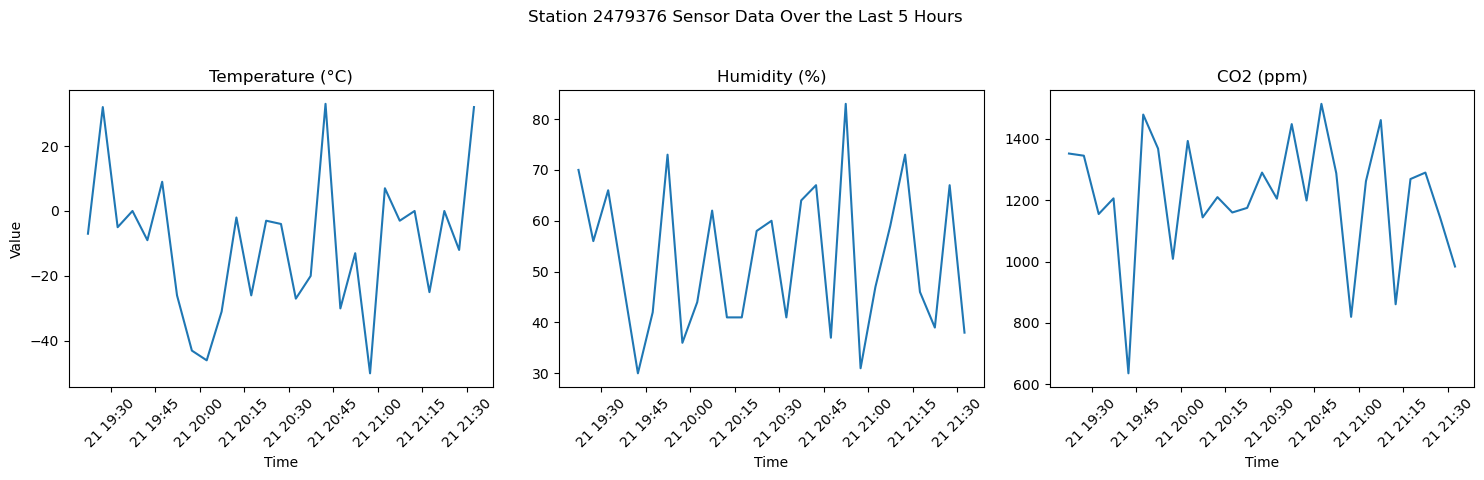

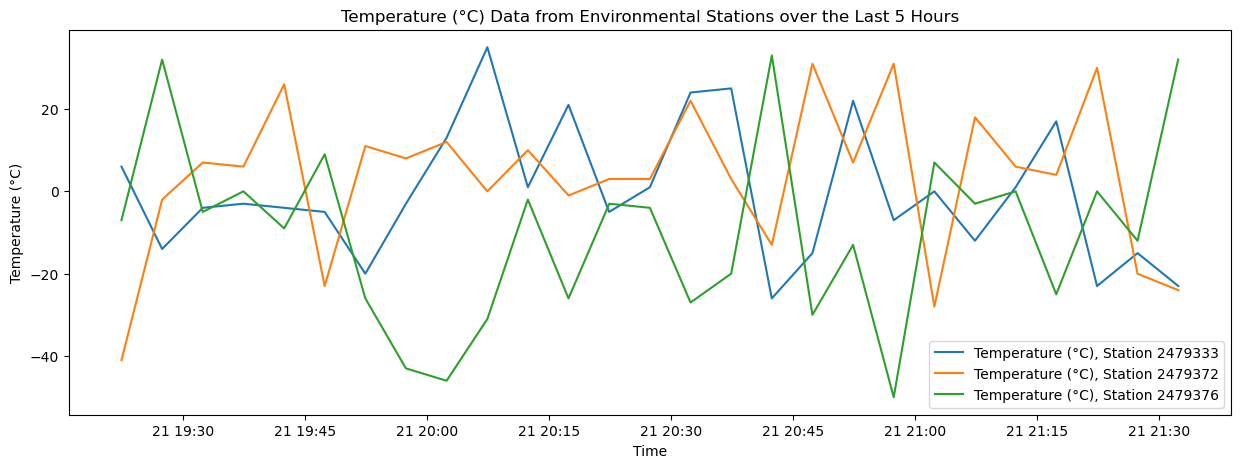

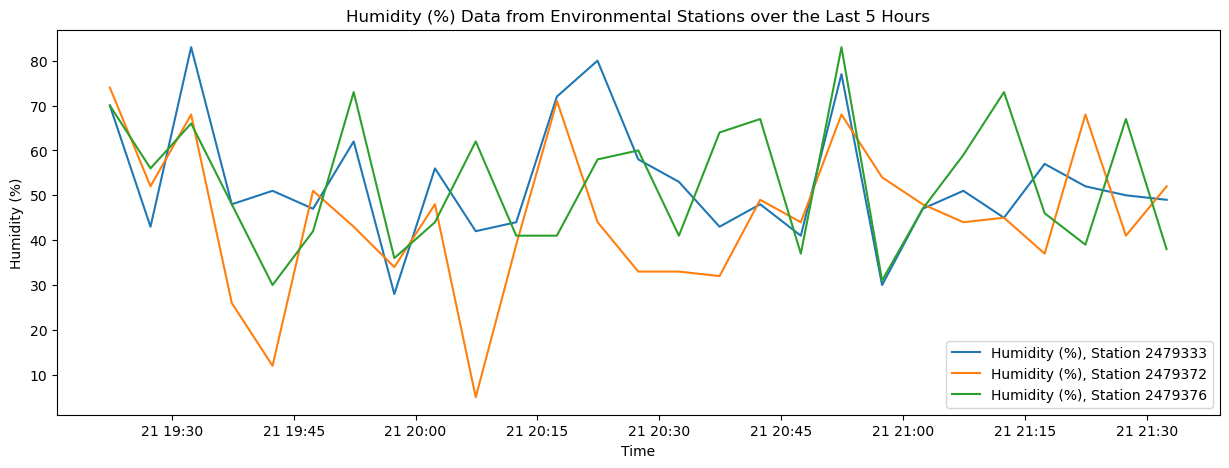

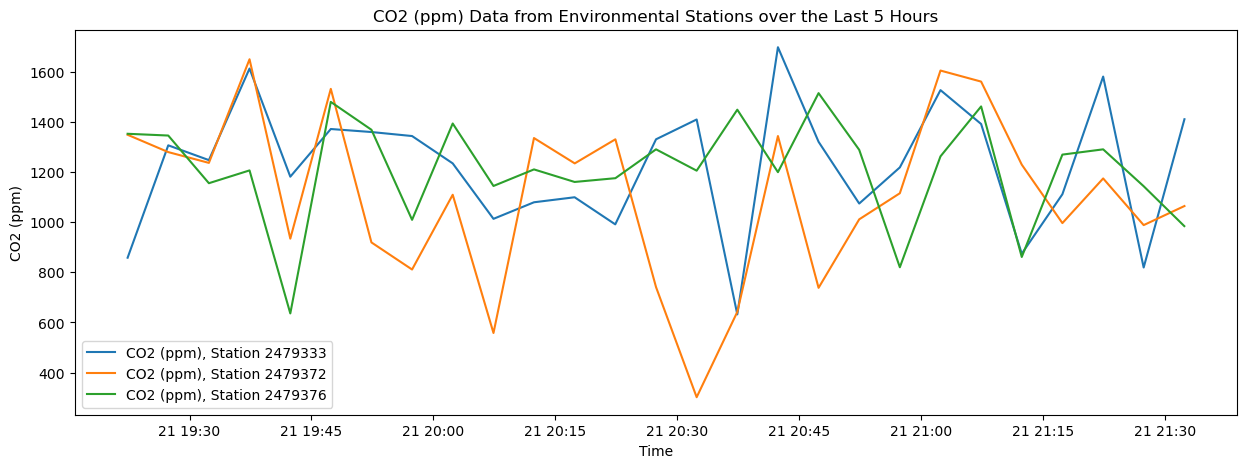

Graphs generated. Updating in 30 seconds...


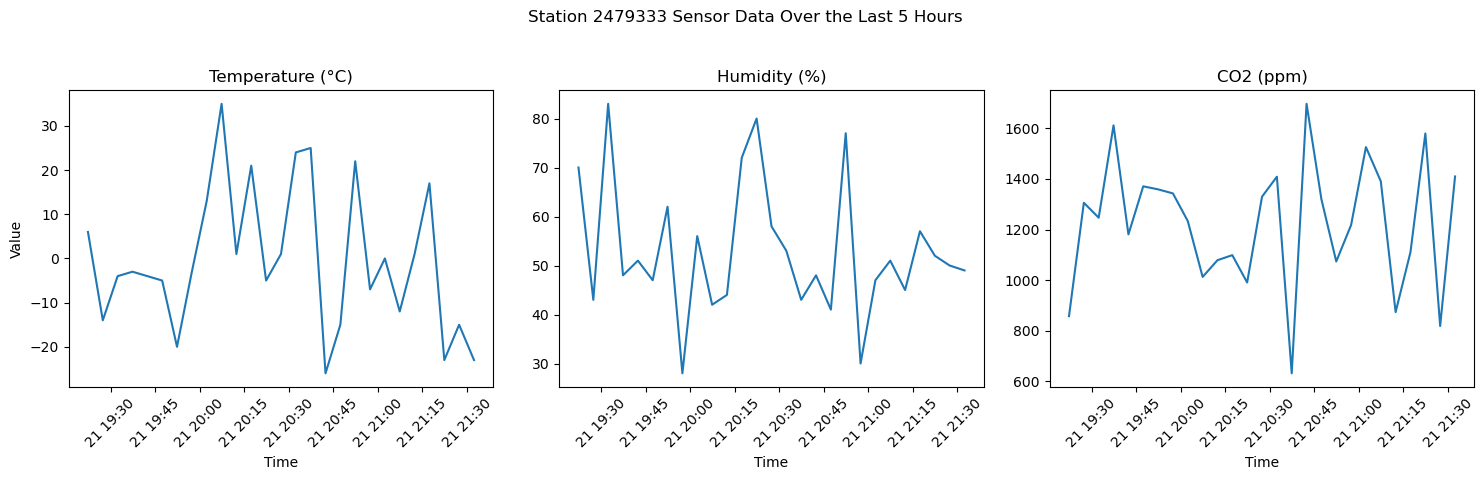

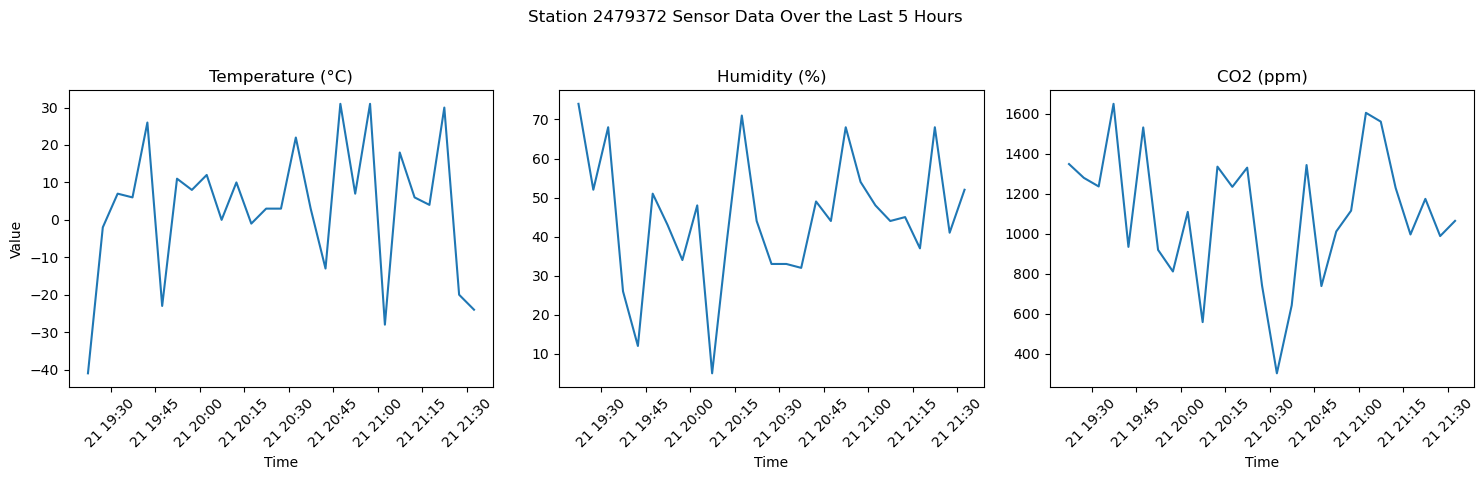

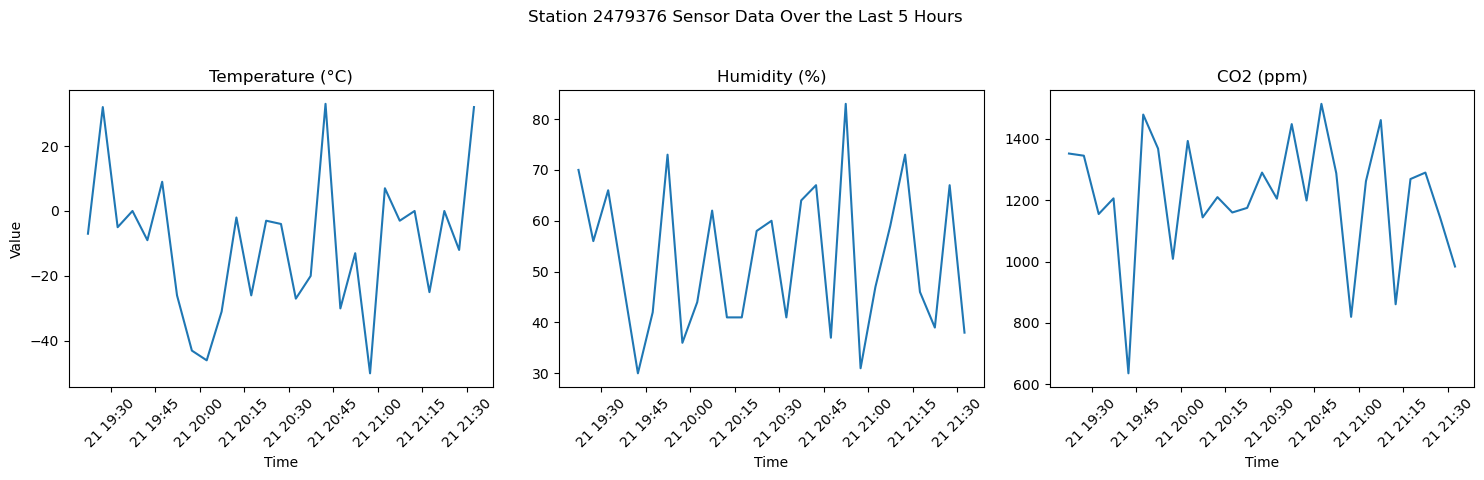

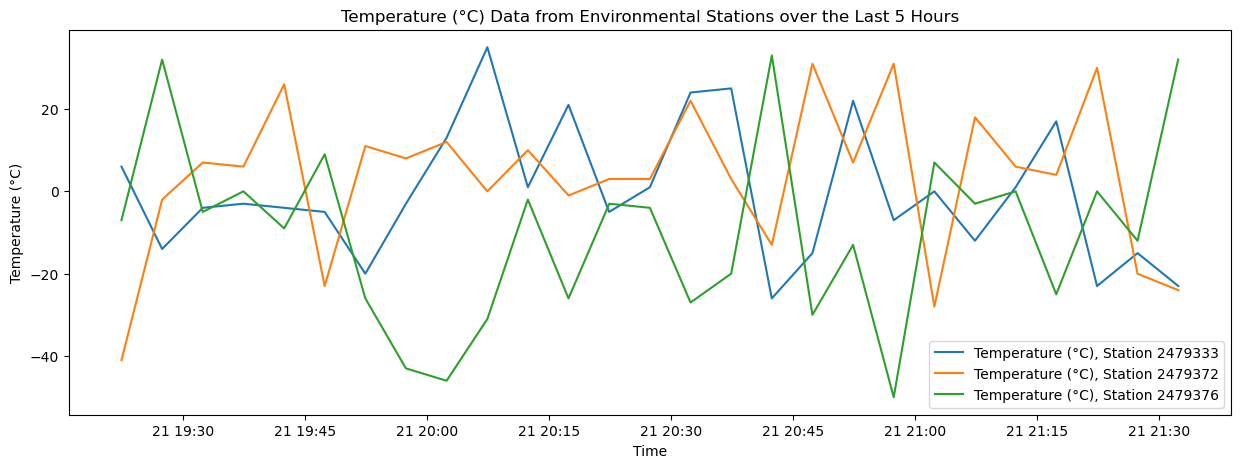

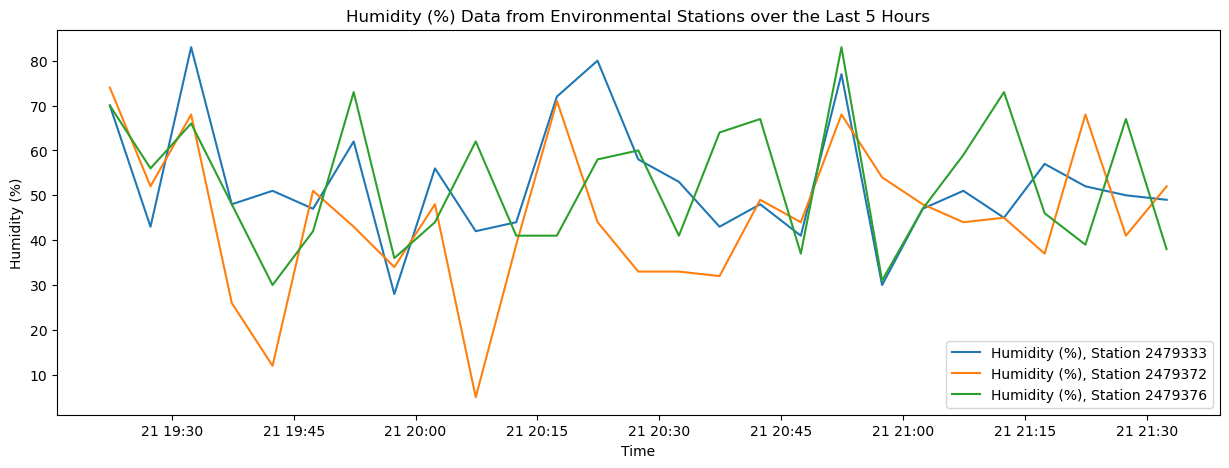

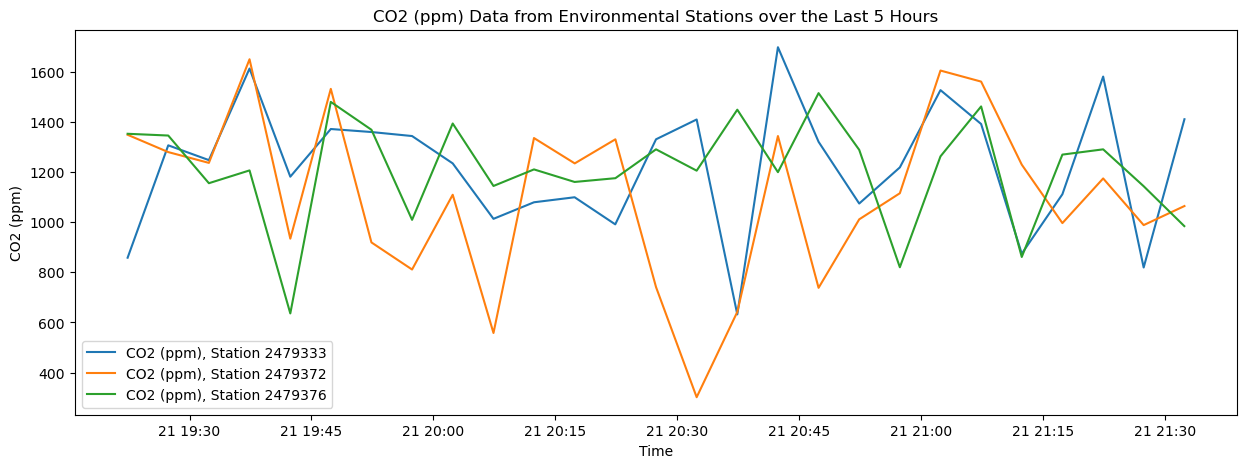

Graphs generated. Updating in 30 seconds...


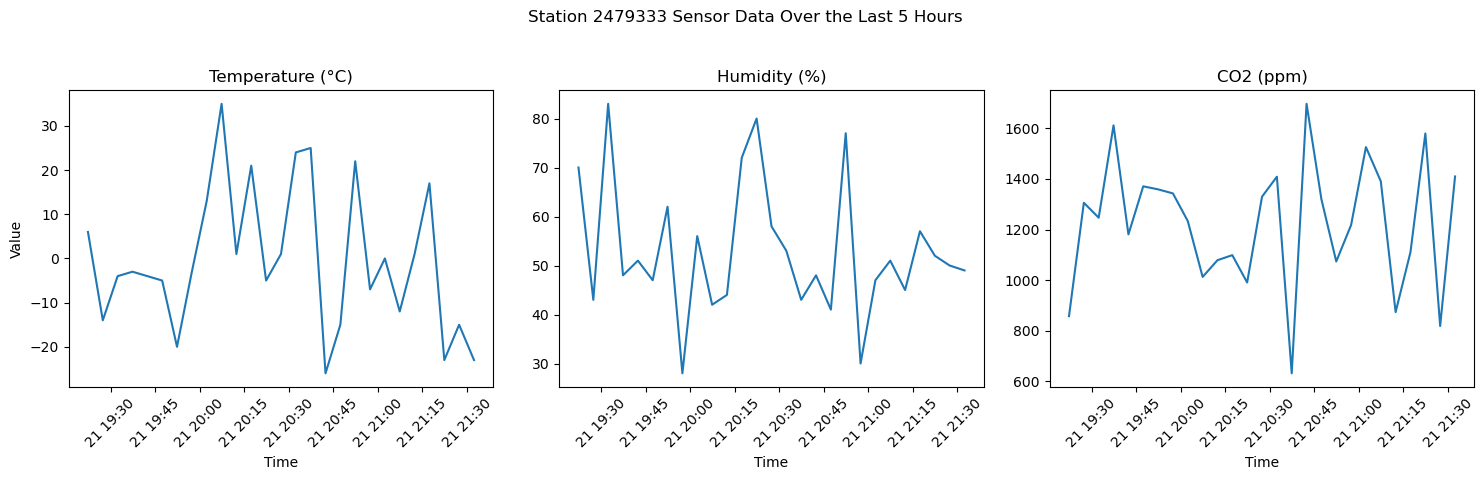

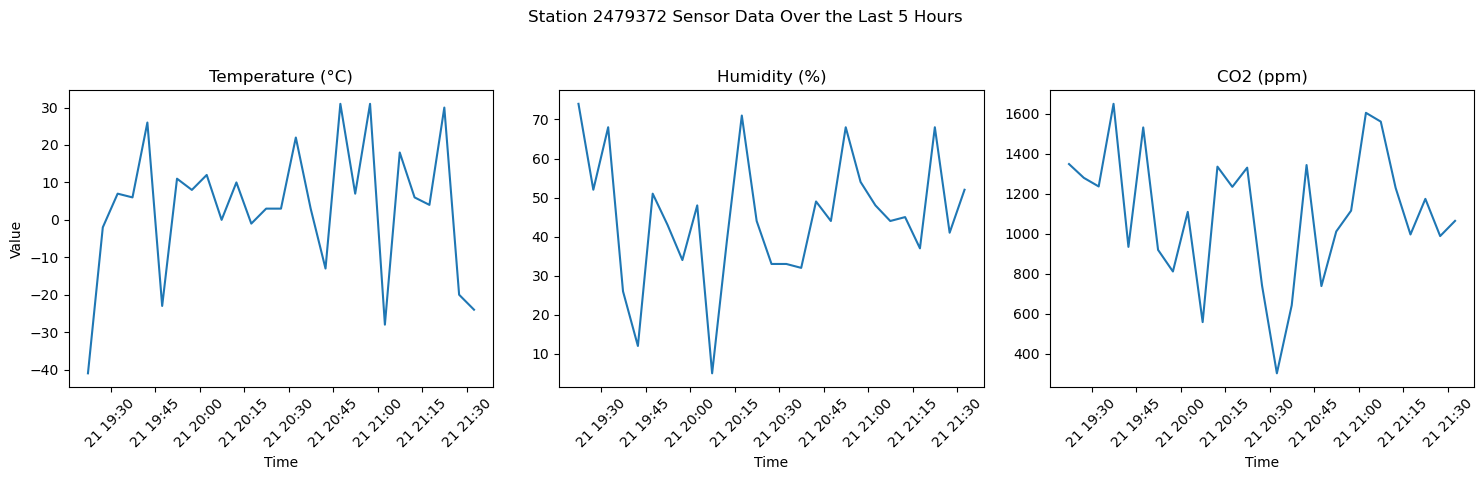

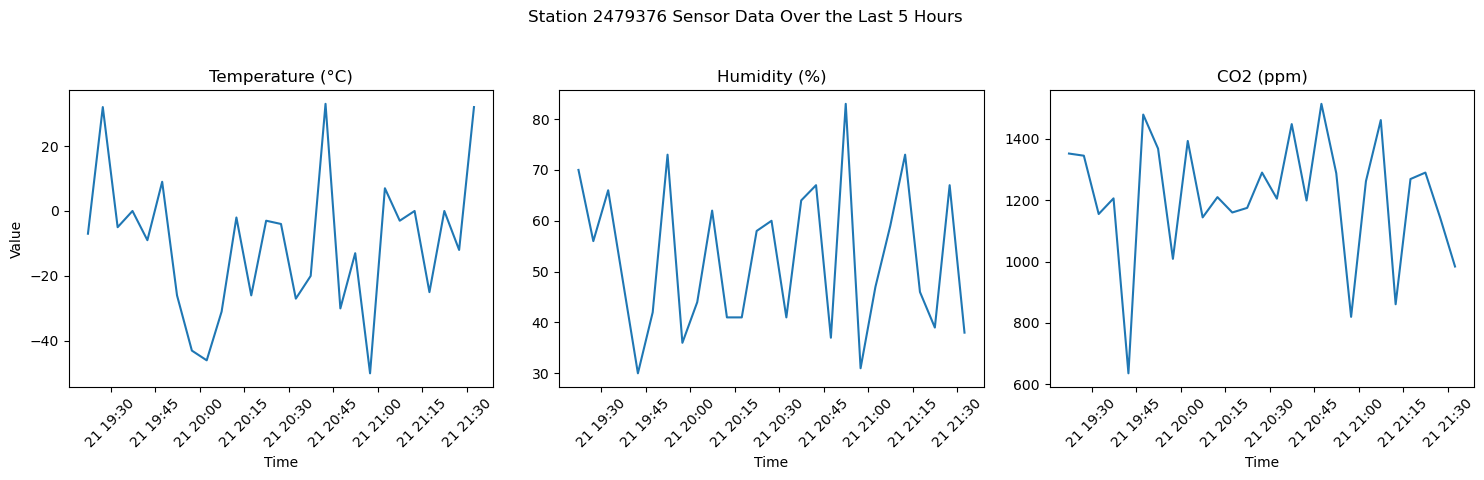

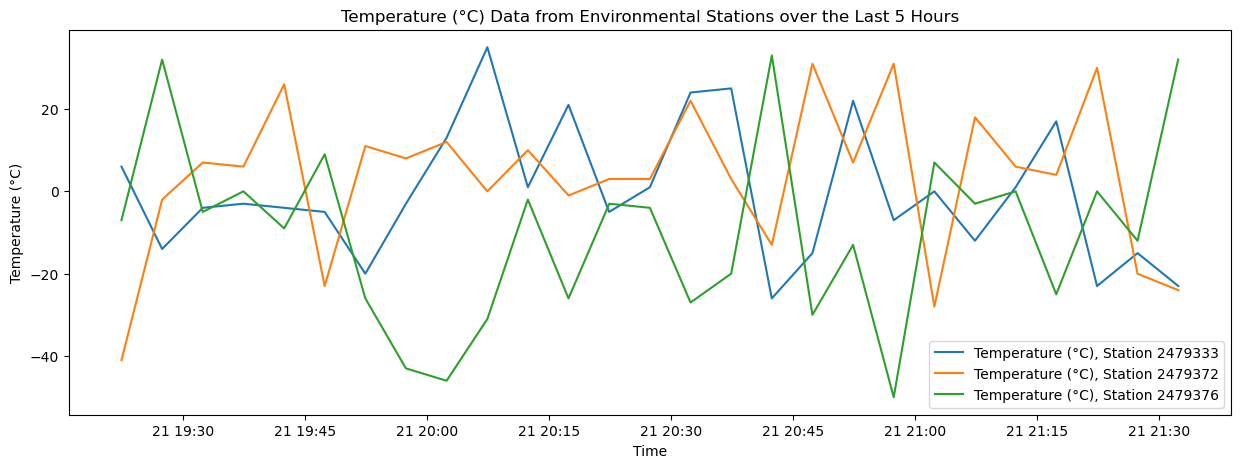

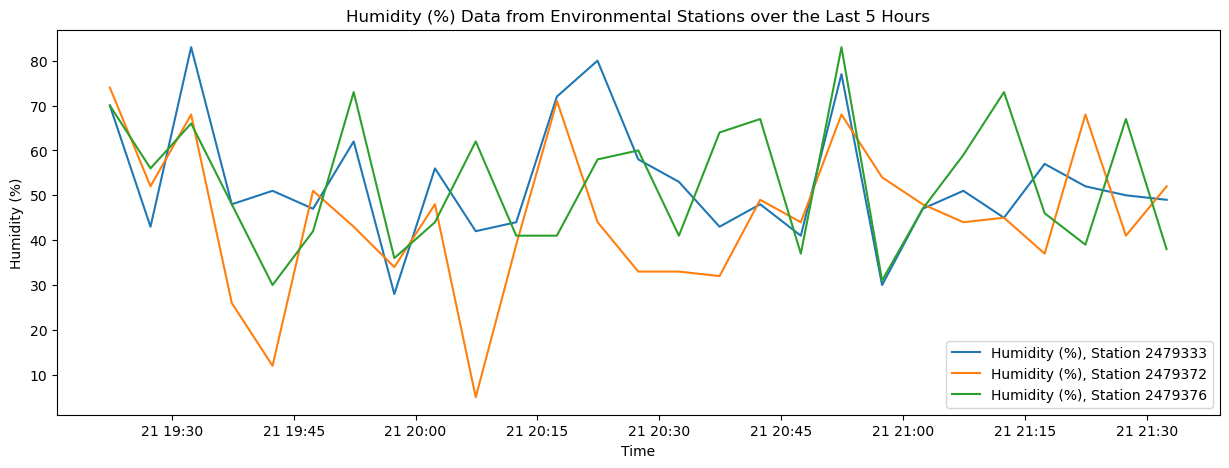

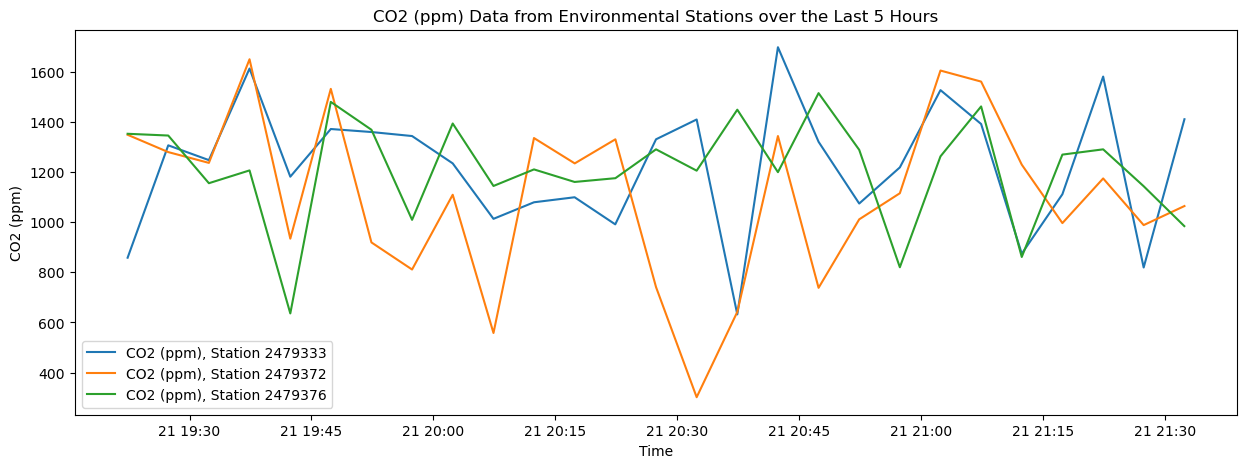

Graphs generated. Updating in 30 seconds...


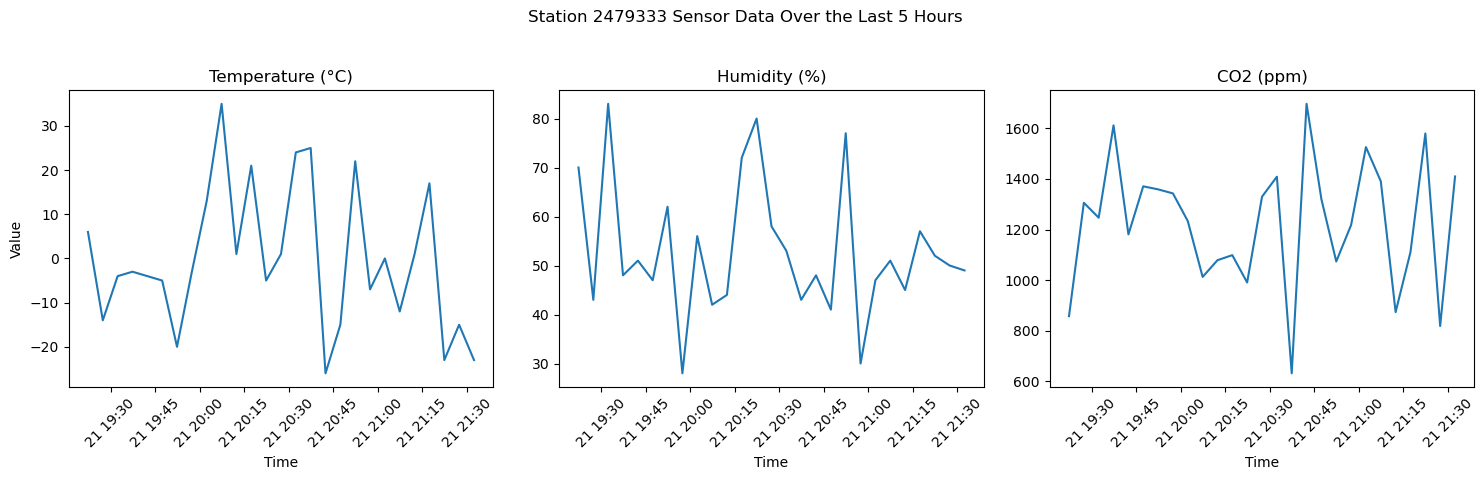

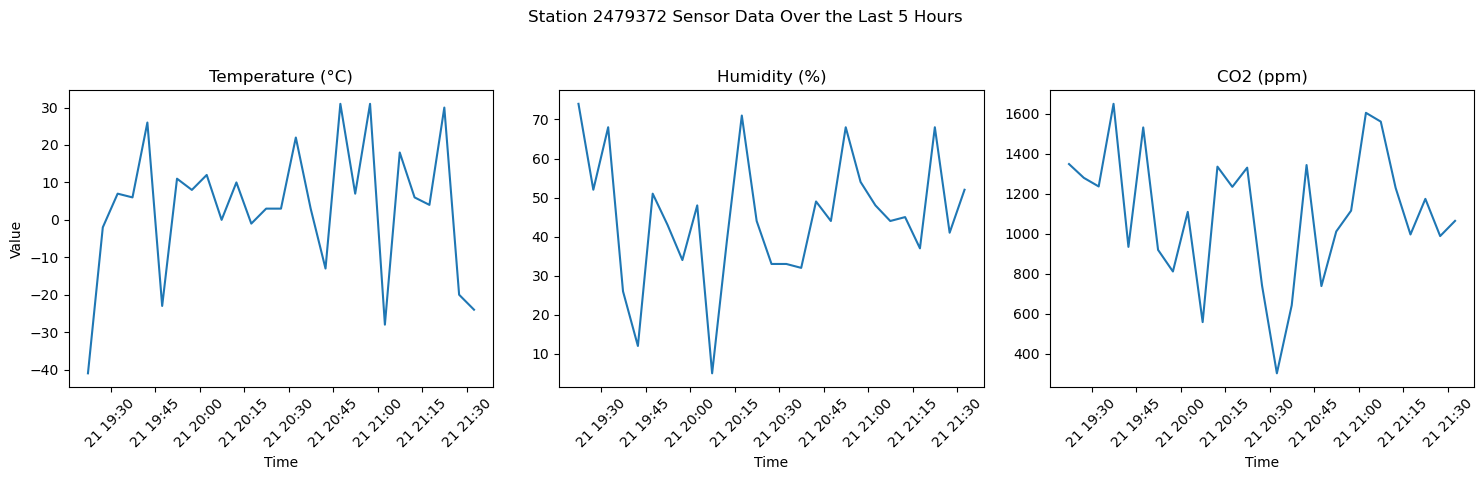

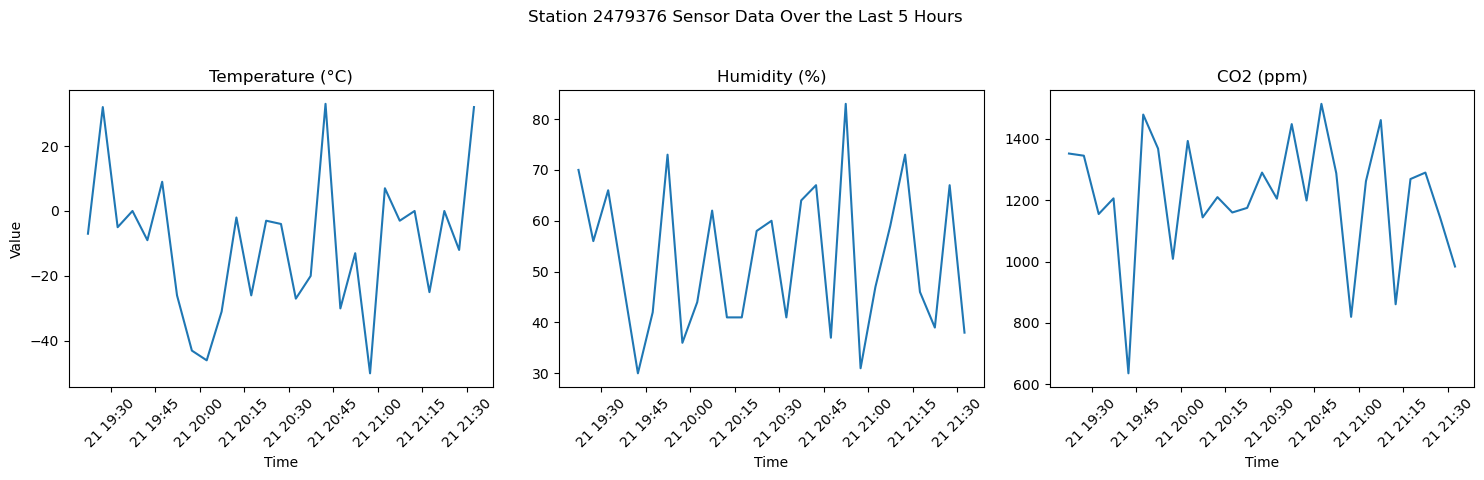

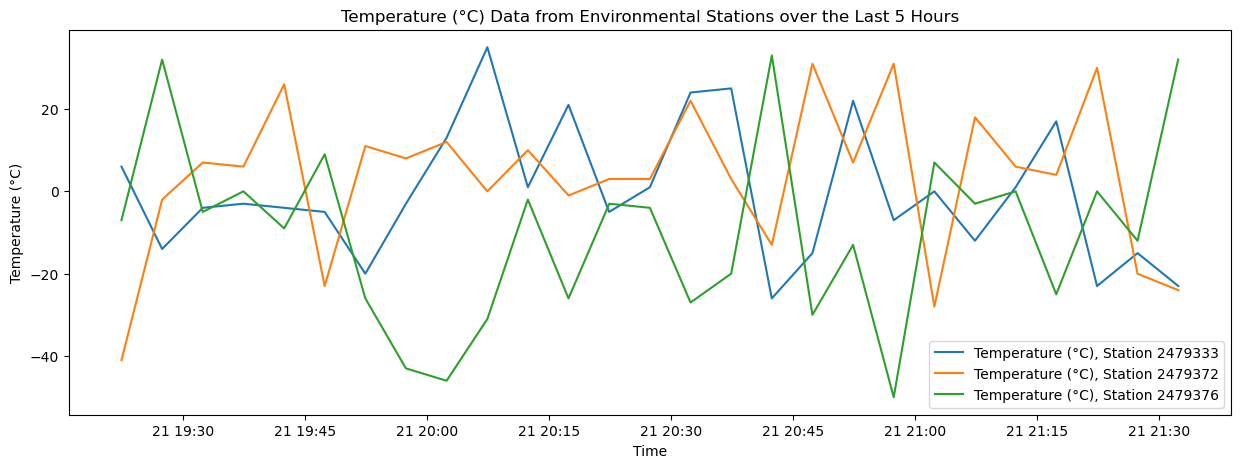

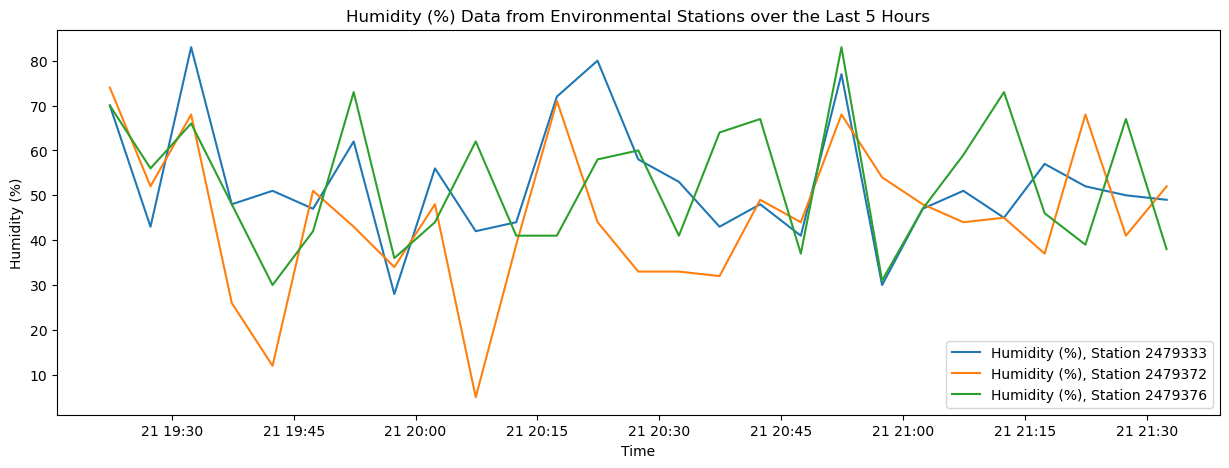

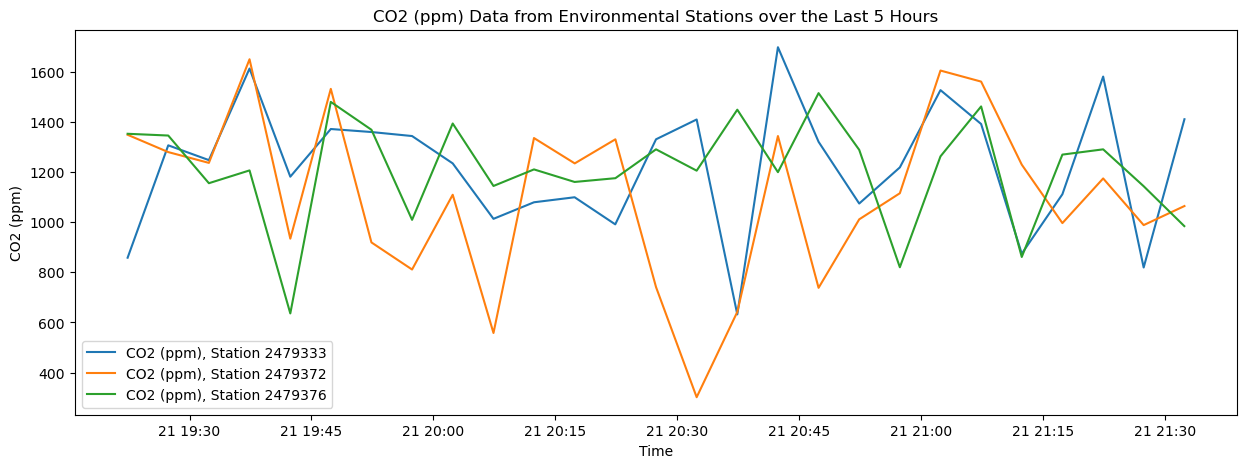

Graphs generated. Updating in 30 seconds...


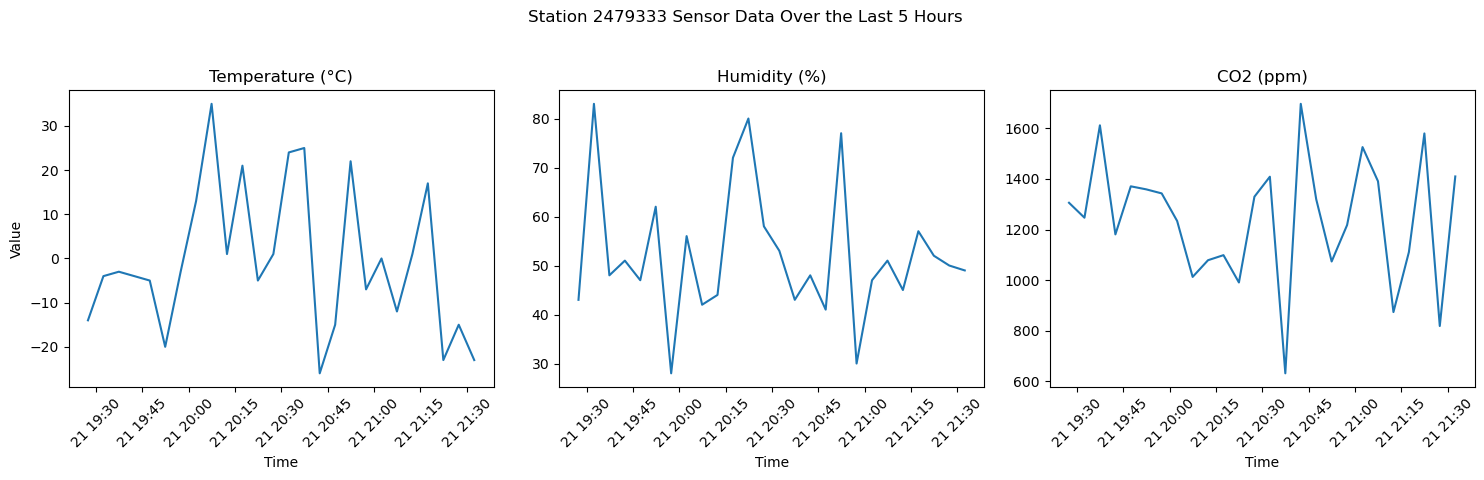

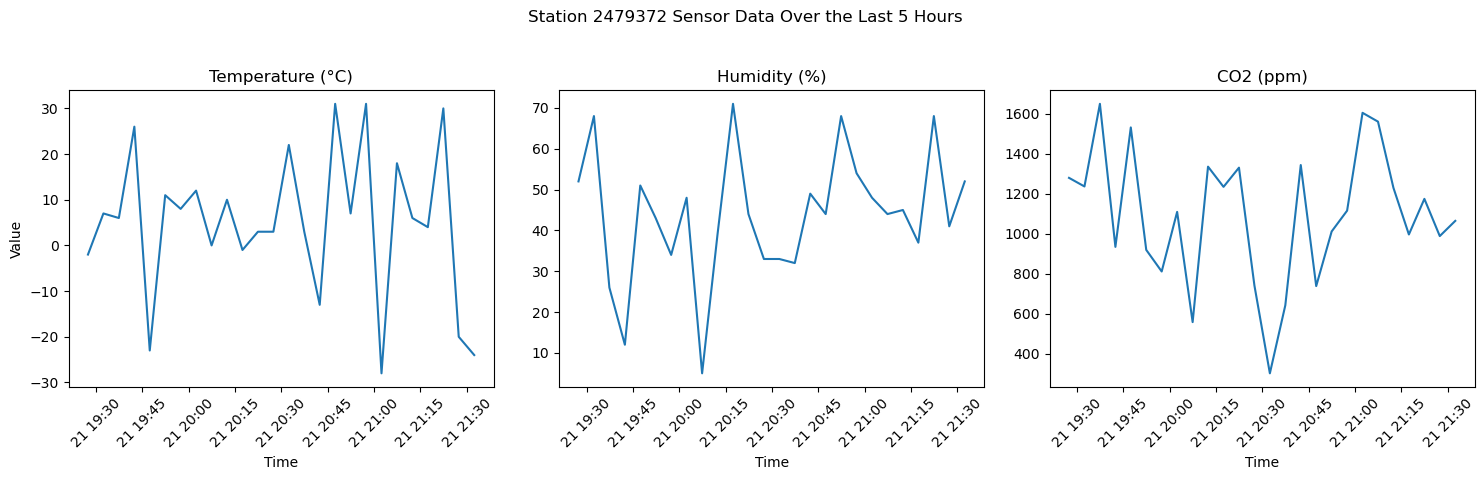

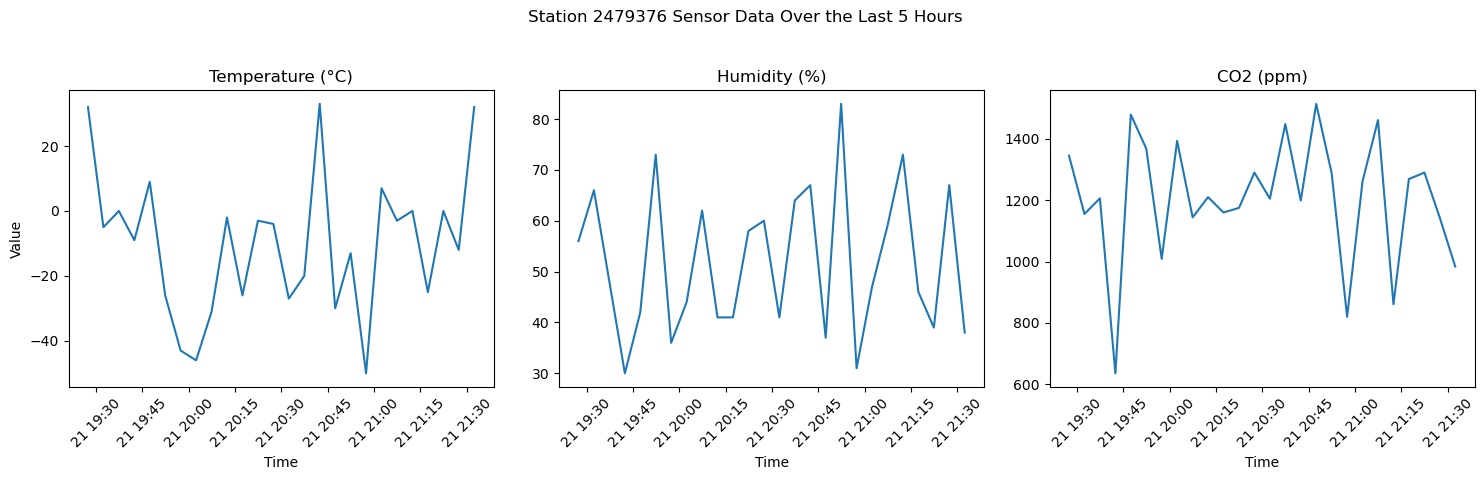

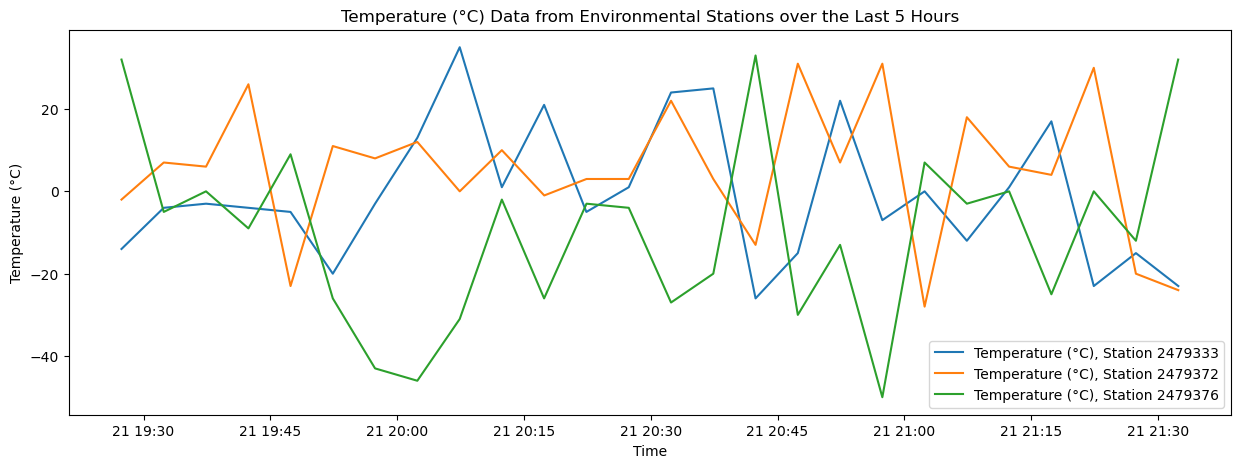

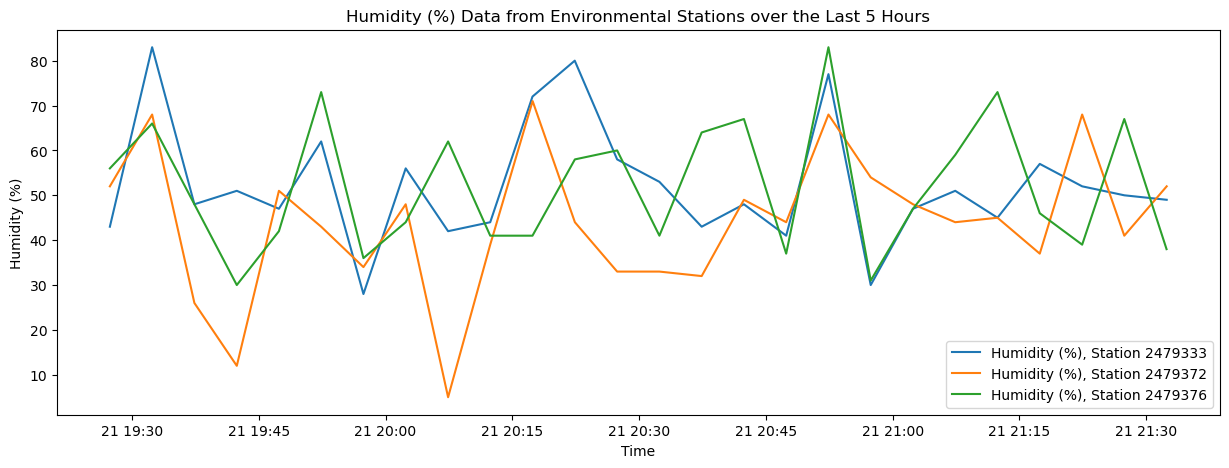

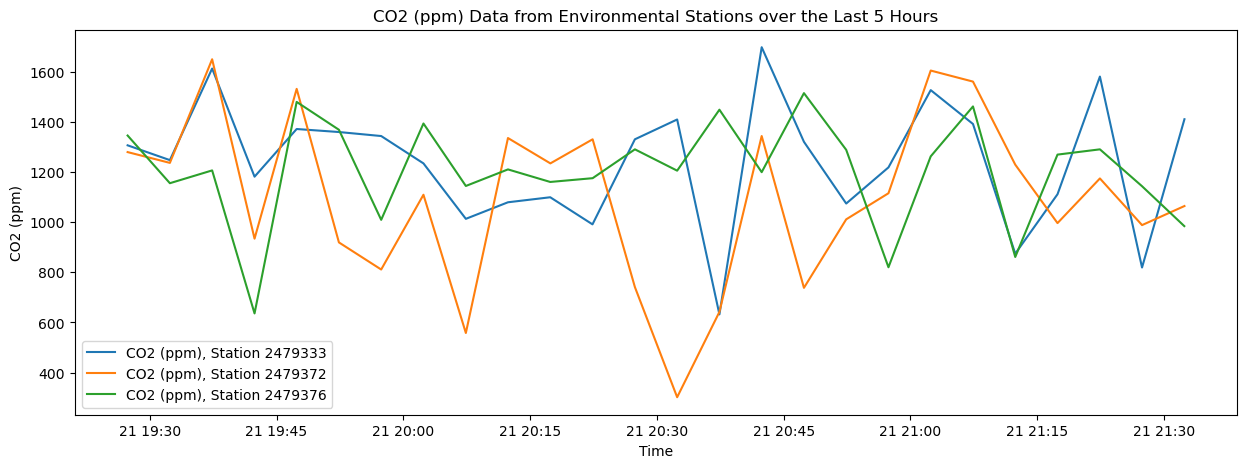

Graphs generated. Updating in 30 seconds...


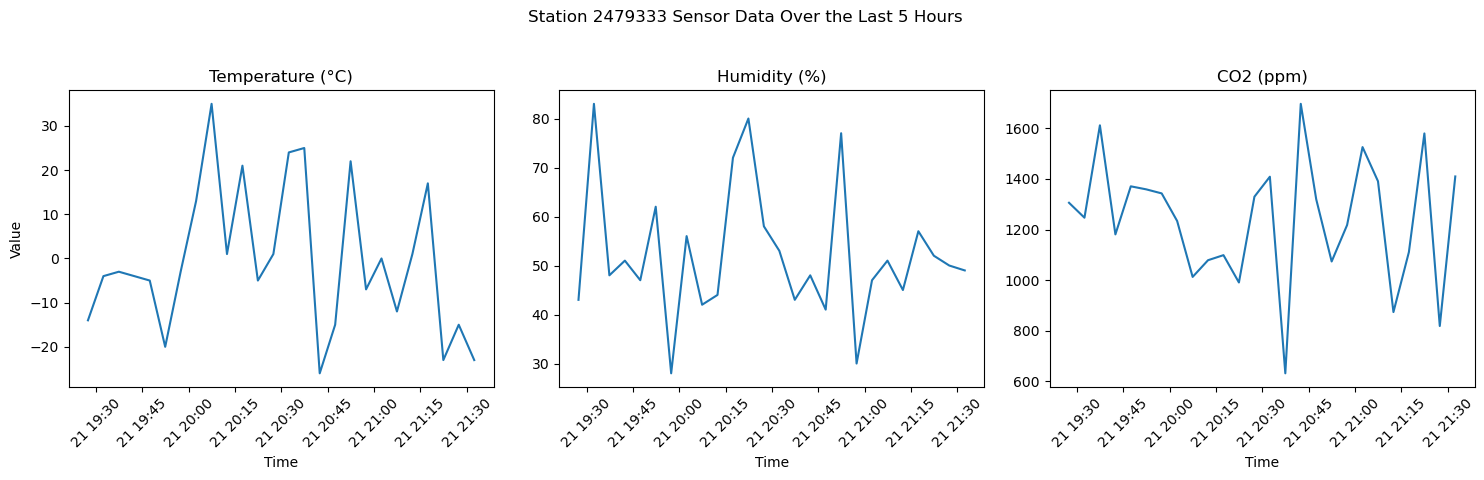

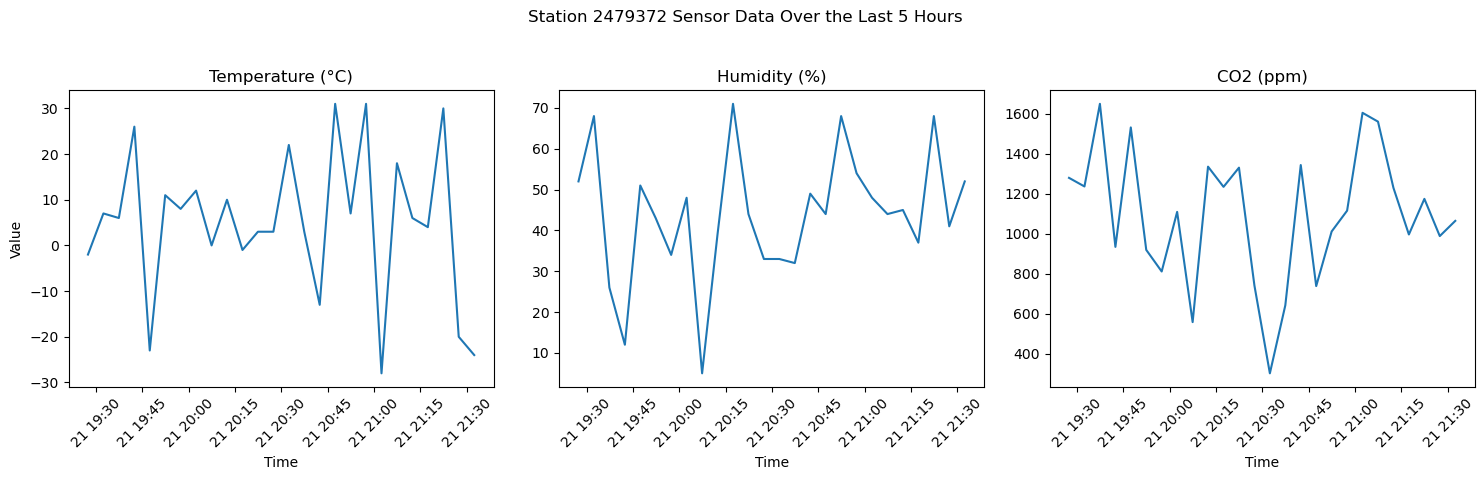

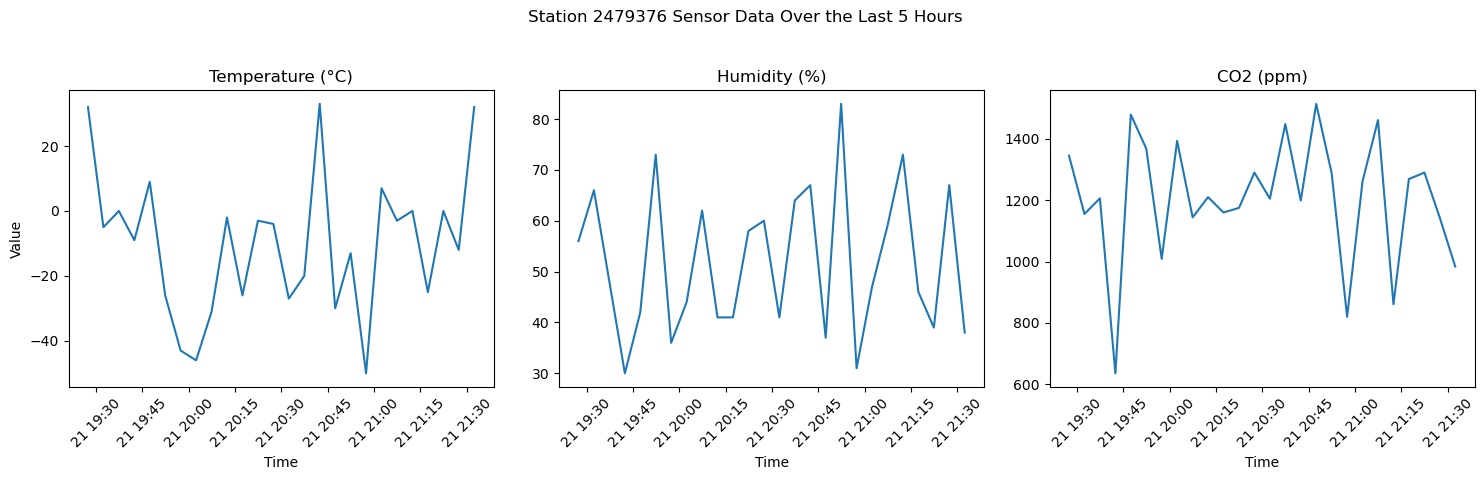

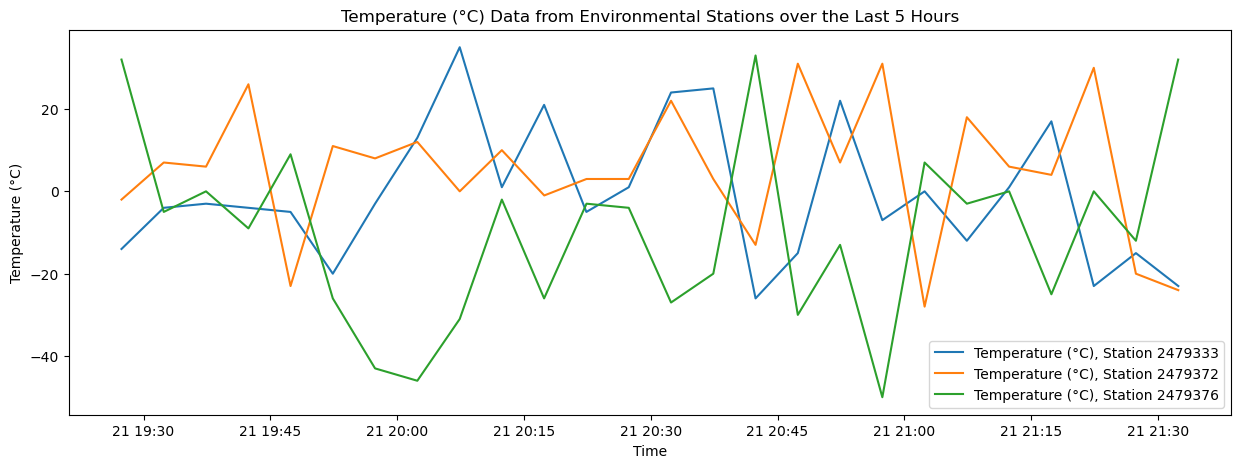

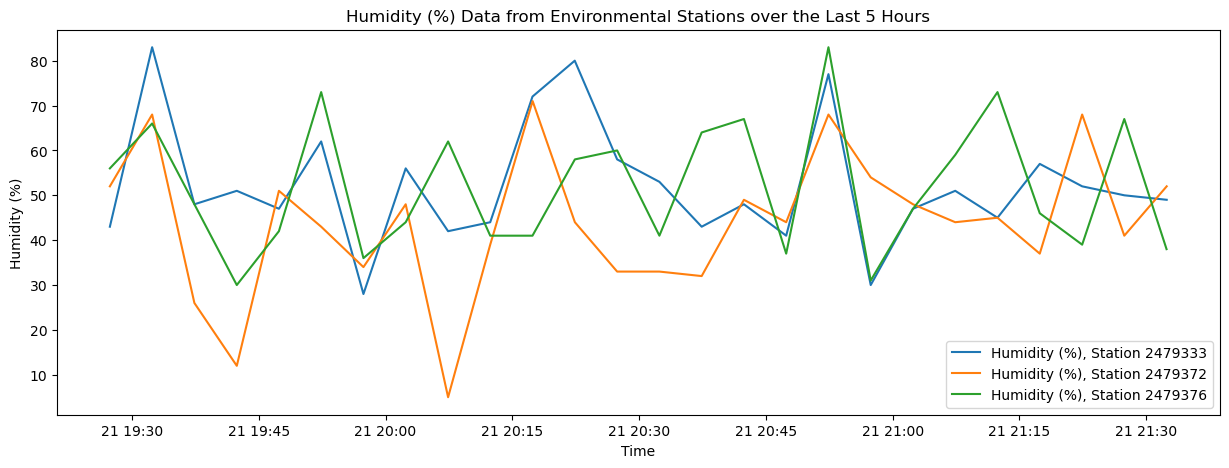

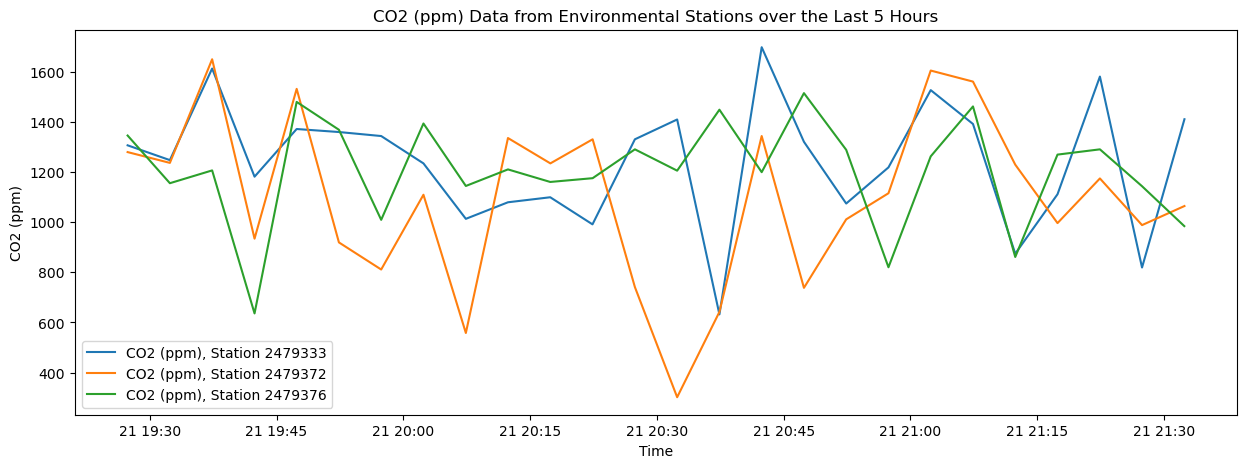

Graphs generated. Updating in 30 seconds...


In [4]:
#loop to do this continuously every 30 seconds (For real time graph tracking)
start_time = time.time()
while time.time() - start_time < 300:  # 5 minutes
    #plot data for each station
    plot_station_sensors()

    #plot data for each sensor type
    plot_sensor_types()

    print("Graphs generated. Updating in 30 seconds...")
    time.sleep(30)